# 1. 인공신경망 (Artificial Neural Network)

### 개념
1. 사람의 신경망을 본떠 만든 네트워크 구조

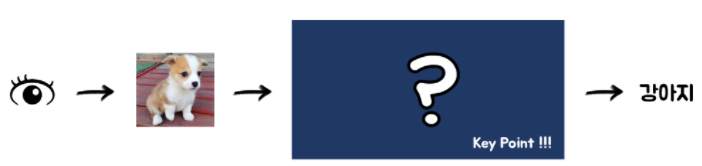

2. 즉, 어떠한 신호를 받고 전달하는 과정을 반복하여 최종적으로 결과를 도출하는 사람의 학습 방법을 기계에 적용한 것

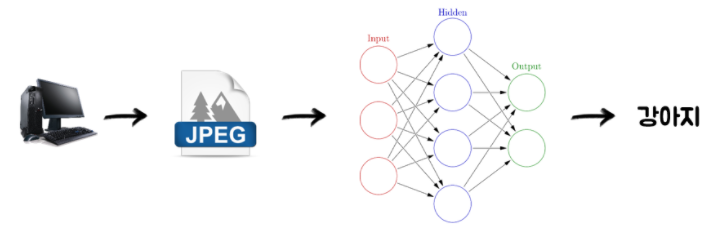

3. 입력층, 은닉층, 출력층으로 구성되어있음

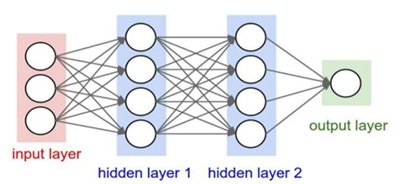  

4. Backpropagation 과정을 통해 매 epoch마다 가중치를 새롭게 업데이트함
5. 은닉층이 깊어질수록 Backpropagation 시 기울기가 소멸되는 위험이 있음


### 인공신경망의 발전 과정
1. 최초에는 입력층과 출력층만 가지고 있는 TLU 형태의 퍼셉트론의 모습이었음 (은닉층 X)
2. 그러나 퍼셉트론은 XOR과 같은 문제를 해결할 수 없는 한계가 있었음
3. XOR 문제와 같은 한계를 해결하기 위해, 은닉층이 추가된 현재의 인공신경망의 모습이 되었음
4. 현재는 인공신경망을 통해 이미지, 자연어 등의 다양한 분야의 문제를 해결할 수 있음

# 2. 실습

### 필요한 모듈 Import

In [1]:
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

### 데이터 탐색

In [335]:
titanic = pd.read_csv('titanic.csv')

In [336]:
#891행의 데이터셋, 변수는 총 12개
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [337]:
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cleaver, Miss. Alice",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [338]:
#결측값 확인결과, Age, Cabin, Embarked에 결측값이 존재함을 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 데이터 시각화

Count of not survived: 549
Count of survived: 342


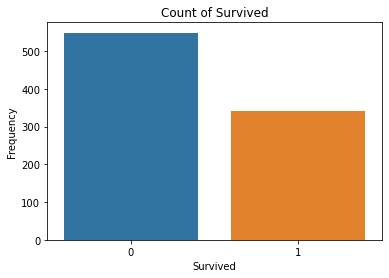

In [339]:
#여성이 남성보다 생존율이 높음을 확인
ax1 = plt.subplots()
ax1 = sns.countplot(titanic['Survived'])
ax1.set_title('Count of Survived')
ax1.set_xlabel('Survived')
ax1.set_ylabel('Frequency')

print("Count of not survived:", sum(titanic["Survived"]==0))
print("Count of survived:", sum(titanic["Survived"]==1))

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


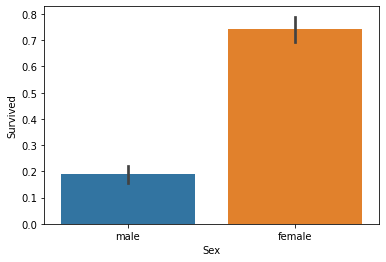

In [340]:
#여성이 남성보다 생존율이 높음을 확인
sns.barplot(x="Sex", y="Survived", data=titanic)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


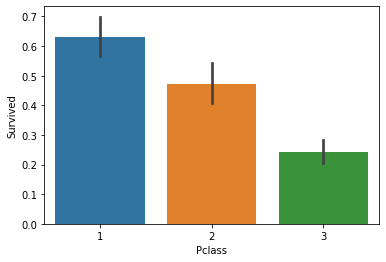

In [341]:
#등급이 높을수록 살아남을 확률이 높음을 확인
sns.barplot(x="Pclass", y="Survived", data=titanic)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", titanic["Survived"][titanic["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["Survived"][titanic["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["Survived"][titanic["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


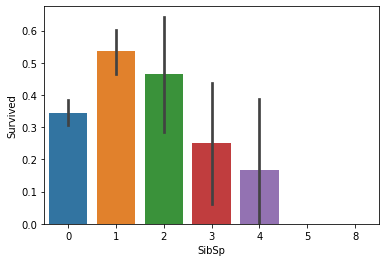

In [342]:
#많은 형제, 자매나 배우자와 함께 여행했을수록 생존할 확률이 낮음
sns.barplot(x="SibSp", y="Survived", data=titanic)

print("Percentage of SibSp = 0 who survived:", titanic["Survived"][titanic["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", titanic["Survived"][titanic["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", titanic["Survived"][titanic["SibSp"] == 2].value_counts(normalize = True)[1]*100)

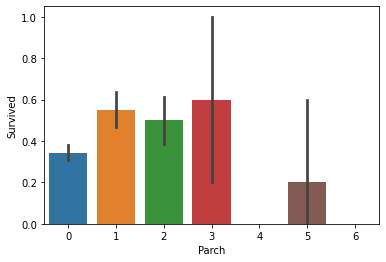

In [343]:
#부모나 자식이 4명보다 적은 사람의 생존 확률이 더 높음
sns.barplot(x="Parch", y="Survived", data=titanic)
plt.show()

### 결측값 처리

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


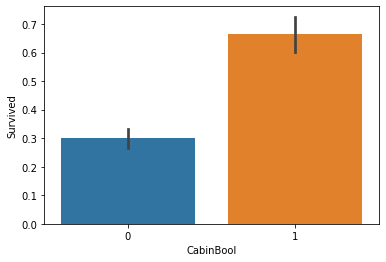

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

titanic["CabinBool"] = (titanic["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", titanic["Survived"][titanic["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", titanic["Survived"][titanic["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=titanic)
plt.show()

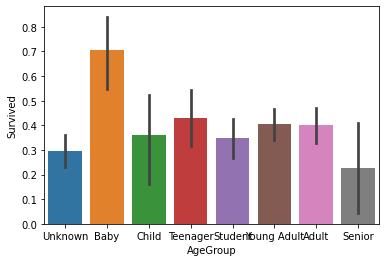

In [345]:
#나이를 범주로 묶어서 결측값을 하나의 범주로 설정
#아기의 경우, 70% 정도의 높은 생존율을 보임을 확인

titanic["Age"] = titanic["Age"].fillna(-0.6)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=titanic)
plt.show()

In [346]:
#Embarked 변수의 경우 결측값이 2개밖에 존재하지 않으므로 해당 행을 삭제
titanic = titanic[titanic['Embarked'].isnull() == False]

In [347]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.6,1,2,W./C. 6607,23.4500,NaN,S,0,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Young Adult


### 불필요한 변수 제거

In [348]:
#PassengerId, Name, Age, Ticket, Cabin 변수는 분석에 불필요한 변수로 판단하여 제거
#Age와 Cabin의 경우, AgeGroup과 CabinBool 변수가 역할을 대신함

titanic = titanic.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'], axis = 1)
titanic

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,0,3,male,1,0,7.2500,S,0,Student
1,1,1,female,1,0,71.2833,C,1,Adult
2,1,3,female,0,0,7.9250,S,0,Young Adult
3,1,1,female,1,0,53.1000,S,1,Young Adult
4,0,3,male,0,0,8.0500,S,0,Young Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,0,Young Adult
887,1,1,female,0,0,30.0000,S,1,Student
888,0,3,female,1,2,23.4500,S,0,Unknown
889,1,1,male,0,0,30.0000,C,1,Young Adult


### 더미변수화

In [349]:
titanic = pd.get_dummies(titanic, drop_first = True)
titanic

,Survived,Pclass,SibSp,Parch,Fare,CabinBool,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,1,0,7.2500,0,1,0,1,0,0,0,1,0,0,0
1,1,1,1,0,71.2833,1,0,0,0,0,0,0,0,0,1,0
2,1,3,0,0,7.9250,0,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,53.1000,1,0,0,1,0,0,0,0,1,0,0
4,0,3,0,0,8.0500,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0,1,0,1,0,0,0,0,1,0,0
887,1,1,0,0,30.0000,1,0,0,1,0,0,0,1,0,0,0
888,0,3,1,2,23.4500,0,0,0,1,0,0,0,0,0,0,0
889,1,1,0,0,30.0000,1,1,0,0,0,0,0,0,1,0,0


In [352]:
titanic.describe(include = 'all')

,Survived,Pclass,SibSp,Parch,Fare,CabinBool,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681,0.227222,0.649044,0.086614,0.724409,0.049494,0.028121,0.078740,0.155231,0.247469,0.218223,0.023622
std,0.486260,0.834700,1.103705,0.806761,49.697504,0.419273,0.477538,0.281427,0.447063,0.217019,0.165413,0.269484,0.362328,0.431784,0.413272,0.151954
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 데이터 분할

In [353]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['Survived'], axis=1)
target = titanic["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.3, random_state = 502)

### Muliple Layer Perceptron (Epoch별)

In [354]:
# MLP (Epoch=100, Layer=2, batch size = 60)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, batch_size=60, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Epoch 1/100
11/11 [==============================] - 0s 12ms/step - loss: 0.8198 - acc: 0.6061 - val_loss: 0.6213 - val_acc: 0.6629
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6267 - acc: 0.6752 - val_loss: 0.6073 - val_acc: 0.7453
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6109 - acc: 0.6849 - val_loss: 0.5971 - val_acc: 0.7303
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6130 - acc: 0.6720 - val_loss: 0.5997 - val_acc: 0.6479
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6034 - acc: 0.6849 - val_loss: 0.5859 - val_acc: 0.7341
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6022 - acc: 0.6688 - val_loss: 0.5996 - val_acc: 0.6442
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5941 - acc: 0.6817 - val_loss: 0.5744 - val_acc: 0.7303
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5984 - 

Epoch 63/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4508 - acc: 0.8183 - val_loss: 0.4884 - val_acc: 0.7828
Epoch 64/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4509 - acc: 0.8023 - val_loss: 0.4726 - val_acc: 0.7715
Epoch 65/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4462 - acc: 0.8199 - val_loss: 0.4614 - val_acc: 0.7790
Epoch 66/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4491 - acc: 0.8119 - val_loss: 0.5048 - val_acc: 0.7603
Epoch 67/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4377 - acc: 0.8151 - val_loss: 0.4656 - val_acc: 0.7715
Epoch 68/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4422 - acc: 0.8151 - val_loss: 0.4697 - val_acc: 0.7753
Epoch 69/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4423 - acc: 0.8151 - val_loss: 0.4754 - val_acc: 0.7678
Epoch 70/100
11/11 [==============================] - 0s 2ms/step - loss: 0.

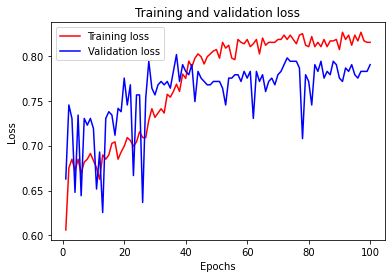

In [355]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [356]:
# MLP (Epoch=1000, Layer=2, batch size = 60)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=1000, batch_size=60, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Epoch 1/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.9644 - acc: 0.6013 - val_loss: 0.6546 - val_acc: 0.6180
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6518 - acc: 0.6350 - val_loss: 0.6374 - val_acc: 0.6629
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6339 - acc: 0.6543 - val_loss: 0.6077 - val_acc: 0.7116
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6096 - acc: 0.6768 - val_loss: 0.6906 - val_acc: 0.6292
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6165 - acc: 0.6656 - val_loss: 0.6133 - val_acc: 0.7266
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6063 - acc: 0.6961 - val_loss: 0.6023 - val_acc: 0.7341
Epoch 7/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6025 - acc: 0.6768 - val_loss: 0.5881 - val_acc: 0.7228
Epoch 8/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

11/11 [==============================] - 0s 2ms/step - loss: 0.4514 - acc: 0.8087 - val_loss: 0.4851 - val_acc: 0.7753
Epoch 63/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4430 - acc: 0.8167 - val_loss: 0.4743 - val_acc: 0.7603
Epoch 64/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4428 - acc: 0.8119 - val_loss: 0.4634 - val_acc: 0.7903
Epoch 65/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4442 - acc: 0.8151 - val_loss: 0.4698 - val_acc: 0.7828
Epoch 66/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4346 - acc: 0.8183 - val_loss: 0.4959 - val_acc: 0.7715
Epoch 67/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4507 - acc: 0.8055 - val_loss: 0.4868 - val_acc: 0.7753
Epoch 68/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4535 - acc: 0.7942 - val_loss: 0.4610 - val_acc: 0.7715
Epoch 69/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4347 -

11/11 [==============================] - 0s 2ms/step - loss: 0.4201 - acc: 0.8055 - val_loss: 0.4544 - val_acc: 0.7865
Epoch 124/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4114 - acc: 0.8135 - val_loss: 0.6083 - val_acc: 0.7303
Epoch 125/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4211 - acc: 0.8087 - val_loss: 0.4559 - val_acc: 0.7790
Epoch 126/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4103 - acc: 0.8119 - val_loss: 0.4704 - val_acc: 0.7790
Epoch 127/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4102 - acc: 0.8167 - val_loss: 0.4978 - val_acc: 0.7790
Epoch 128/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4320 - acc: 0.8006 - val_loss: 0.4573 - val_acc: 0.7903
Epoch 129/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4092 - acc: 0.8151 - val_loss: 0.4580 - val_acc: 0.7903
Epoch 130/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

Epoch 184/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3989 - acc: 0.8280 - val_loss: 0.4851 - val_acc: 0.7753
Epoch 185/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4025 - acc: 0.8248 - val_loss: 0.4922 - val_acc: 0.7678
Epoch 186/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3985 - acc: 0.8248 - val_loss: 0.4523 - val_acc: 0.7940
Epoch 187/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3937 - acc: 0.8328 - val_loss: 0.5070 - val_acc: 0.7790
Epoch 188/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4015 - acc: 0.8199 - val_loss: 0.4544 - val_acc: 0.8015
Epoch 189/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3966 - acc: 0.8199 - val_loss: 0.4659 - val_acc: 0.7978
Epoch 190/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3943 - acc: 0.8296 - val_loss: 0.4592 - val_acc: 0.7978
Epoch 191/1000
11/11 [==============================] - 0s 2ms

11/11 [==============================] - 0s 2ms/step - loss: 0.3855 - acc: 0.8424 - val_loss: 0.4534 - val_acc: 0.8015
Epoch 246/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3836 - acc: 0.8360 - val_loss: 0.4532 - val_acc: 0.7903
Epoch 247/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3988 - acc: 0.8312 - val_loss: 0.4591 - val_acc: 0.7828
Epoch 248/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3823 - acc: 0.8441 - val_loss: 0.5016 - val_acc: 0.7678
Epoch 249/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3920 - acc: 0.8328 - val_loss: 0.4604 - val_acc: 0.8015
Epoch 250/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3823 - acc: 0.8392 - val_loss: 0.5034 - val_acc: 0.7753
Epoch 251/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3924 - acc: 0.8360 - val_loss: 0.4552 - val_acc: 0.8015
Epoch 252/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

Epoch 306/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3844 - acc: 0.8360 - val_loss: 0.4553 - val_acc: 0.8052
Epoch 307/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3786 - acc: 0.8521 - val_loss: 0.4790 - val_acc: 0.7715
Epoch 308/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3767 - acc: 0.8360 - val_loss: 0.5173 - val_acc: 0.7753
Epoch 309/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3735 - acc: 0.8521 - val_loss: 0.4921 - val_acc: 0.7715
Epoch 310/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3771 - acc: 0.8376 - val_loss: 0.4948 - val_acc: 0.7865
Epoch 311/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3770 - acc: 0.8392 - val_loss: 0.4829 - val_acc: 0.7903
Epoch 312/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3791 - acc: 0.8312 - val_loss: 0.4784 - val_acc: 0.7715
Epoch 313/1000
11/11 [==============================] - 0s 2ms

Epoch 367/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3632 - acc: 0.8601 - val_loss: 0.4623 - val_acc: 0.8015
Epoch 368/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3556 - acc: 0.8521 - val_loss: 0.5005 - val_acc: 0.7828
Epoch 369/1000
11/11 [==============================] - ETA: 0s - loss: 0.2915 - acc: 0.866 - 0s 2ms/step - loss: 0.3699 - acc: 0.8521 - val_loss: 0.4638 - val_acc: 0.8015
Epoch 370/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3593 - acc: 0.8585 - val_loss: 0.4630 - val_acc: 0.8052
Epoch 371/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3550 - acc: 0.8585 - val_loss: 0.4626 - val_acc: 0.8052
Epoch 372/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3676 - acc: 0.8537 - val_loss: 0.4789 - val_acc: 0.7978
Epoch 373/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.8569 - val_loss: 0.4623 - val_acc: 0.8015
Epoch 374/1000
11/11 [==

11/11 [==============================] - 0s 2ms/step - loss: 0.3565 - acc: 0.8601 - val_loss: 0.4725 - val_acc: 0.8015
Epoch 428/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3486 - acc: 0.8617 - val_loss: 0.4848 - val_acc: 0.7865
Epoch 429/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3540 - acc: 0.8537 - val_loss: 0.5331 - val_acc: 0.7865
Epoch 430/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3520 - acc: 0.8601 - val_loss: 0.4692 - val_acc: 0.7940
Epoch 431/1000
11/11 [==============================] - ETA: 0s - loss: 0.4333 - acc: 0.800 - 0s 2ms/step - loss: 0.3519 - acc: 0.8521 - val_loss: 0.5404 - val_acc: 0.7828
Epoch 432/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3531 - acc: 0.8553 - val_loss: 0.5111 - val_acc: 0.7828
Epoch 433/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3503 - acc: 0.8617 - val_loss: 0.4708 - val_acc: 0.7865
Epoch 434/1000
11/11 [=================

11/11 [==============================] - 0s 2ms/step - loss: 0.3594 - acc: 0.8553 - val_loss: 0.5754 - val_acc: 0.7678
Epoch 488/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3433 - acc: 0.8617 - val_loss: 0.4730 - val_acc: 0.8052
Epoch 489/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3498 - acc: 0.8601 - val_loss: 0.5836 - val_acc: 0.7603
Epoch 490/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3528 - acc: 0.8505 - val_loss: 0.4826 - val_acc: 0.7903
Epoch 491/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3424 - acc: 0.8537 - val_loss: 0.6000 - val_acc: 0.7603
Epoch 492/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3581 - acc: 0.8537 - val_loss: 0.4757 - val_acc: 0.8052
Epoch 493/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3487 - acc: 0.8537 - val_loss: 0.4757 - val_acc: 0.8165
Epoch 494/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

Epoch 548/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3432 - acc: 0.8521 - val_loss: 0.5453 - val_acc: 0.7790
Epoch 549/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3491 - acc: 0.8666 - val_loss: 0.4782 - val_acc: 0.8052
Epoch 550/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3390 - acc: 0.8682 - val_loss: 0.4834 - val_acc: 0.7978
Epoch 551/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3418 - acc: 0.8650 - val_loss: 0.5131 - val_acc: 0.7828
Epoch 552/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3409 - acc: 0.8585 - val_loss: 0.6366 - val_acc: 0.7603
Epoch 553/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3367 - acc: 0.8553 - val_loss: 0.5099 - val_acc: 0.7865
Epoch 554/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3406 - acc: 0.8601 - val_loss: 0.4789 - val_acc: 0.8090
Epoch 555/1000
11/11 [==============================] - 0s 2ms

11/11 [==============================] - 0s 2ms/step - loss: 0.3475 - acc: 0.8682 - val_loss: 0.5007 - val_acc: 0.7903
Epoch 609/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3426 - acc: 0.8666 - val_loss: 0.4887 - val_acc: 0.7940
Epoch 610/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3355 - acc: 0.8650 - val_loss: 0.4953 - val_acc: 0.7903
Epoch 611/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3313 - acc: 0.8762 - val_loss: 0.5018 - val_acc: 0.7790
Epoch 612/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3279 - acc: 0.8698 - val_loss: 0.5754 - val_acc: 0.7753
Epoch 613/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3409 - acc: 0.8666 - val_loss: 0.5585 - val_acc: 0.7790
Epoch 614/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3343 - acc: 0.8617 - val_loss: 0.5350 - val_acc: 0.7640
Epoch 615/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

11/11 [==============================] - 0s 2ms/step - loss: 0.3361 - acc: 0.8650 - val_loss: 0.5284 - val_acc: 0.7790
Epoch 669/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3458 - acc: 0.8617 - val_loss: 0.5182 - val_acc: 0.7940
Epoch 670/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3276 - acc: 0.8714 - val_loss: 0.5581 - val_acc: 0.7828
Epoch 671/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3362 - acc: 0.8601 - val_loss: 0.5579 - val_acc: 0.7715
Epoch 672/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3448 - acc: 0.8569 - val_loss: 0.5154 - val_acc: 0.7865
Epoch 673/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3280 - acc: 0.8666 - val_loss: 0.5004 - val_acc: 0.8015
Epoch 674/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3305 - acc: 0.8714 - val_loss: 0.4963 - val_acc: 0.7940
Epoch 675/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

11/11 [==============================] - 0s 2ms/step - loss: 0.3378 - acc: 0.8650 - val_loss: 0.5031 - val_acc: 0.7865
Epoch 730/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3249 - acc: 0.8794 - val_loss: 0.5076 - val_acc: 0.7903
Epoch 731/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3285 - acc: 0.8714 - val_loss: 0.5093 - val_acc: 0.7828
Epoch 732/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3308 - acc: 0.8553 - val_loss: 0.5065 - val_acc: 0.7753
Epoch 733/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3300 - acc: 0.8698 - val_loss: 0.5021 - val_acc: 0.7715
Epoch 734/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3233 - acc: 0.8730 - val_loss: 0.7914 - val_acc: 0.7303
Epoch 735/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3465 - acc: 0.8601 - val_loss: 0.5088 - val_acc: 0.7865
Epoch 736/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

11/11 [==============================] - 0s 2ms/step - loss: 0.3285 - acc: 0.8666 - val_loss: 0.5169 - val_acc: 0.7790
Epoch 790/1000
11/11 [==============================] - ETA: 0s - loss: 0.3427 - acc: 0.883 - 0s 2ms/step - loss: 0.3397 - acc: 0.8521 - val_loss: 0.5892 - val_acc: 0.7678
Epoch 791/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3282 - acc: 0.8682 - val_loss: 0.5166 - val_acc: 0.7790
Epoch 792/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3234 - acc: 0.8569 - val_loss: 0.5263 - val_acc: 0.7790
Epoch 793/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3229 - acc: 0.8698 - val_loss: 0.5354 - val_acc: 0.7678
Epoch 794/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3281 - acc: 0.8682 - val_loss: 0.5295 - val_acc: 0.7903
Epoch 795/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.3294 - acc: 0.8617 - val_loss: 0.5267 - val_acc: 0.7753
Epoch 796/1000
11/11 [=================

Epoch 850/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3240 - acc: 0.8601 - val_loss: 0.6180 - val_acc: 0.7678
Epoch 851/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3195 - acc: 0.8714 - val_loss: 0.5550 - val_acc: 0.7828
Epoch 852/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3230 - acc: 0.8762 - val_loss: 0.6546 - val_acc: 0.7603
Epoch 853/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3405 - acc: 0.8617 - val_loss: 0.5245 - val_acc: 0.7715
Epoch 854/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3216 - acc: 0.8650 - val_loss: 0.5386 - val_acc: 0.7828
Epoch 855/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3441 - acc: 0.8633 - val_loss: 0.5275 - val_acc: 0.7715
Epoch 856/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3192 - acc: 0.8650 - val_loss: 0.5549 - val_acc: 0.7790
Epoch 857/1000
11/11 [==============================] - 0s 2ms

11/11 [==============================] - 0s 2ms/step - loss: 0.3228 - acc: 0.8633 - val_loss: 0.5537 - val_acc: 0.7603
Epoch 912/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3241 - acc: 0.8682 - val_loss: 0.5356 - val_acc: 0.7715
Epoch 913/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3185 - acc: 0.8762 - val_loss: 0.5937 - val_acc: 0.7828
Epoch 914/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3362 - acc: 0.8666 - val_loss: 0.5340 - val_acc: 0.7678
Epoch 915/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3157 - acc: 0.8666 - val_loss: 0.5250 - val_acc: 0.7790
Epoch 916/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3228 - acc: 0.8666 - val_loss: 0.5977 - val_acc: 0.7753
Epoch 917/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3191 - acc: 0.8746 - val_loss: 0.5775 - val_acc: 0.7828
Epoch 918/1000
11/11 [==============================] - 0s 2ms/step - loss: 0

Epoch 972/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3236 - acc: 0.8714 - val_loss: 0.5475 - val_acc: 0.7640
Epoch 973/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3233 - acc: 0.8698 - val_loss: 0.6198 - val_acc: 0.7715
Epoch 974/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3233 - acc: 0.8601 - val_loss: 0.5366 - val_acc: 0.7678
Epoch 975/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3152 - acc: 0.8746 - val_loss: 0.5457 - val_acc: 0.7715
Epoch 976/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3179 - acc: 0.8698 - val_loss: 0.5362 - val_acc: 0.7678
Epoch 977/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3187 - acc: 0.8730 - val_loss: 0.5378 - val_acc: 0.7678
Epoch 978/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3225 - acc: 0.8601 - val_loss: 0.7121 - val_acc: 0.7491
Epoch 979/1000
11/11 [==============================] - 0s 2ms

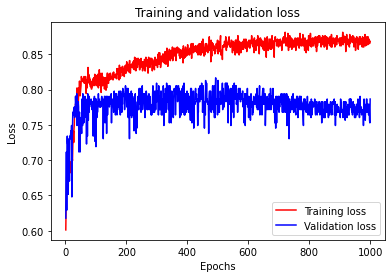

In [357]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [358]:
# MLP (Epoch=10000, Layer=2, batch size = 60)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10000, batch_size=60, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Epoch 1/10000
11/11 [==============================] - 0s 11ms/step - loss: 1.0910 - acc: 0.4405 - val_loss: 0.7559 - val_acc: 0.3670
Epoch 2/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.7276 - acc: 0.4084 - val_loss: 0.7132 - val_acc: 0.3895
Epoch 3/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.6980 - acc: 0.4871 - val_loss: 0.6748 - val_acc: 0.5993
Epoch 4/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.6658 - acc: 0.6559 - val_loss: 0.6820 - val_acc: 0.6142
Epoch 5/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.6418 - acc: 0.7138 - val_loss: 0.6373 - val_acc: 0.6854
Epoch 6/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.6229 - acc: 0.7042 - val_loss: 0.6068 - val_acc: 0.6404
Epoch 7/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.5963 - acc: 0.6881 - val_loss: 0.5695 - val_acc: 0.7715
Epoch 8/10000
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 0.4528 - acc: 0.8087 - val_loss: 0.4625 - val_acc: 0.7790
Epoch 62/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4533 - acc: 0.8055 - val_loss: 0.5231 - val_acc: 0.7191
Epoch 63/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4536 - acc: 0.8039 - val_loss: 0.4647 - val_acc: 0.7678
Epoch 64/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4548 - acc: 0.8135 - val_loss: 0.4568 - val_acc: 0.7753
Epoch 65/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4466 - acc: 0.8135 - val_loss: 0.4632 - val_acc: 0.7903
Epoch 66/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4419 - acc: 0.8167 - val_loss: 0.4829 - val_acc: 0.7828
Epoch 67/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4463 - acc: 0.8183 - val_loss: 0.4536 - val_acc: 0.7715
Epoch 68/10000
11/11 [==============================] - 0s 2ms/step - loss: 0

11/11 [==============================] - 0s 2ms/step - loss: 0.4007 - acc: 0.8183 - val_loss: 0.4670 - val_acc: 0.7903
Epoch 123/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4128 - acc: 0.8312 - val_loss: 0.4451 - val_acc: 0.7790
Epoch 124/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4085 - acc: 0.8328 - val_loss: 0.4403 - val_acc: 0.7978
Epoch 125/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4020 - acc: 0.8264 - val_loss: 0.4411 - val_acc: 0.8015
Epoch 126/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4040 - acc: 0.8232 - val_loss: 0.4398 - val_acc: 0.7940
Epoch 127/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4039 - acc: 0.8360 - val_loss: 0.5094 - val_acc: 0.7828
Epoch 128/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4096 - acc: 0.8199 - val_loss: 0.4610 - val_acc: 0.7865
Epoch 129/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 0.3845 - acc: 0.8408 - val_loss: 0.4744 - val_acc: 0.7828
Epoch 183/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3969 - acc: 0.8328 - val_loss: 0.4683 - val_acc: 0.7865
Epoch 184/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3864 - acc: 0.8376 - val_loss: 0.6713 - val_acc: 0.7266
Epoch 185/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.4223 - acc: 0.8264 - val_loss: 0.4520 - val_acc: 0.7903
Epoch 186/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.3845 - acc: 0.8408 - val_loss: 0.4572 - val_acc: 0.7940
Epoch 187/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3856 - acc: 0.8344 - val_loss: 0.4531 - val_acc: 0.7828
Epoch 188/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3858 - acc: 0.8280 - val_loss: 0.4546 - val_acc: 0.7978
Epoch 189/10000
11/11 [==============================] - 0s 2ms/step - 

Epoch 243/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3727 - acc: 0.8505 - val_loss: 0.4678 - val_acc: 0.7940
Epoch 244/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3676 - acc: 0.8537 - val_loss: 0.5057 - val_acc: 0.7940
Epoch 245/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3663 - acc: 0.8489 - val_loss: 0.4607 - val_acc: 0.7978
Epoch 246/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3768 - acc: 0.8473 - val_loss: 0.4602 - val_acc: 0.8015
Epoch 247/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3750 - acc: 0.8473 - val_loss: 0.4648 - val_acc: 0.7978
Epoch 248/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3661 - acc: 0.8457 - val_loss: 0.4630 - val_acc: 0.7940
Epoch 249/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3751 - acc: 0.8505 - val_loss: 0.4640 - val_acc: 0.7978
Epoch 250/10000
11/11 [==============================] 

11/11 [==============================] - 0s 2ms/step - loss: 0.3620 - acc: 0.8537 - val_loss: 0.5118 - val_acc: 0.7903
Epoch 304/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3617 - acc: 0.8585 - val_loss: 0.4743 - val_acc: 0.7903
Epoch 305/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3678 - acc: 0.8424 - val_loss: 0.4733 - val_acc: 0.7828
Epoch 306/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3582 - acc: 0.8537 - val_loss: 0.4740 - val_acc: 0.7940
Epoch 307/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3552 - acc: 0.8553 - val_loss: 0.4723 - val_acc: 0.7903
Epoch 308/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3732 - acc: 0.8473 - val_loss: 0.4717 - val_acc: 0.7865
Epoch 309/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3590 - acc: 0.8489 - val_loss: 0.4783 - val_acc: 0.7828
Epoch 310/10000
11/11 [==============================] - 0s 2ms/step - 

Epoch 364/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3594 - acc: 0.8473 - val_loss: 0.5512 - val_acc: 0.7865
Epoch 365/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3534 - acc: 0.8585 - val_loss: 0.4870 - val_acc: 0.7865
Epoch 366/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3563 - acc: 0.8553 - val_loss: 0.4901 - val_acc: 0.7940
Epoch 367/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3497 - acc: 0.8585 - val_loss: 0.5754 - val_acc: 0.7828
Epoch 368/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3516 - acc: 0.8489 - val_loss: 0.5037 - val_acc: 0.8015
Epoch 369/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3544 - acc: 0.8521 - val_loss: 0.5145 - val_acc: 0.7940
Epoch 370/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3518 - acc: 0.8585 - val_loss: 0.4887 - val_acc: 0.7865
Epoch 371/10000
11/11 [==============================] 

11/11 [==============================] - 0s 2ms/step - loss: 0.3508 - acc: 0.8617 - val_loss: 0.4993 - val_acc: 0.7903
Epoch 425/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3513 - acc: 0.8489 - val_loss: 0.5015 - val_acc: 0.7790
Epoch 426/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3488 - acc: 0.8569 - val_loss: 0.5541 - val_acc: 0.7903
Epoch 427/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3535 - acc: 0.8650 - val_loss: 0.4965 - val_acc: 0.7940
Epoch 428/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3472 - acc: 0.8601 - val_loss: 0.5310 - val_acc: 0.7865
Epoch 429/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3473 - acc: 0.8521 - val_loss: 0.5803 - val_acc: 0.7790
Epoch 430/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3473 - acc: 0.8650 - val_loss: 0.6121 - val_acc: 0.7790
Epoch 431/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 0.3396 - acc: 0.8553 - val_loss: 0.5373 - val_acc: 0.7865
Epoch 485/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3419 - acc: 0.8617 - val_loss: 0.5291 - val_acc: 0.7865
Epoch 486/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3435 - acc: 0.8585 - val_loss: 0.5021 - val_acc: 0.7940
Epoch 487/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3499 - acc: 0.8617 - val_loss: 0.5120 - val_acc: 0.7865
Epoch 488/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3359 - acc: 0.8650 - val_loss: 0.5053 - val_acc: 0.7753
Epoch 489/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3403 - acc: 0.8666 - val_loss: 0.5543 - val_acc: 0.7828
Epoch 490/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3438 - acc: 0.8489 - val_loss: 0.5121 - val_acc: 0.7828
Epoch 491/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 0.3375 - acc: 0.8682 - val_loss: 0.5633 - val_acc: 0.7828
Epoch 545/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3411 - acc: 0.8633 - val_loss: 0.5231 - val_acc: 0.7715
Epoch 546/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3356 - acc: 0.8585 - val_loss: 0.5629 - val_acc: 0.7790
Epoch 547/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3389 - acc: 0.8601 - val_loss: 0.5212 - val_acc: 0.7865
Epoch 548/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3314 - acc: 0.8730 - val_loss: 0.5381 - val_acc: 0.7865
Epoch 549/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3363 - acc: 0.8682 - val_loss: 0.5377 - val_acc: 0.7865
Epoch 550/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3355 - acc: 0.8633 - val_loss: 0.5144 - val_acc: 0.7828
Epoch 551/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 0.3324 - acc: 0.8569 - val_loss: 0.5498 - val_acc: 0.7940
Epoch 605/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3308 - acc: 0.8666 - val_loss: 0.5604 - val_acc: 0.7940
Epoch 606/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3328 - acc: 0.8585 - val_loss: 0.5892 - val_acc: 0.7865
Epoch 607/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3302 - acc: 0.8650 - val_loss: 0.5375 - val_acc: 0.7978
Epoch 608/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3271 - acc: 0.8650 - val_loss: 0.5520 - val_acc: 0.8015
Epoch 609/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3316 - acc: 0.8650 - val_loss: 0.5351 - val_acc: 0.7903
Epoch 610/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3348 - acc: 0.8650 - val_loss: 0.5415 - val_acc: 0.7940
Epoch 611/10000
11/11 [==============================] - 0s 2ms/step - 

Epoch 664/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3439 - acc: 0.8714 - val_loss: 0.5394 - val_acc: 0.7903
Epoch 665/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3229 - acc: 0.8617 - val_loss: 0.5594 - val_acc: 0.7828
Epoch 666/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3280 - acc: 0.8682 - val_loss: 0.5505 - val_acc: 0.7903
Epoch 667/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3411 - acc: 0.8569 - val_loss: 0.5673 - val_acc: 0.7715
Epoch 668/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3267 - acc: 0.8617 - val_loss: 0.5588 - val_acc: 0.7940
Epoch 669/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3254 - acc: 0.8585 - val_loss: 0.5418 - val_acc: 0.7790
Epoch 670/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3303 - acc: 0.8633 - val_loss: 0.5483 - val_acc: 0.7753
Epoch 671/10000
11/11 [==============================] 

Epoch 724/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3354 - acc: 0.8521 - val_loss: 0.5627 - val_acc: 0.7640
Epoch 725/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3193 - acc: 0.8682 - val_loss: 0.5613 - val_acc: 0.7790
Epoch 726/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3230 - acc: 0.8682 - val_loss: 0.5516 - val_acc: 0.7828
Epoch 727/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3201 - acc: 0.8682 - val_loss: 0.5819 - val_acc: 0.7865
Epoch 728/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3375 - acc: 0.8666 - val_loss: 0.6199 - val_acc: 0.7828
Epoch 729/10000
11/11 [==============================] - ETA: 0s - loss: 0.3351 - acc: 0.883 - 0s 2ms/step - loss: 0.3235 - acc: 0.8778 - val_loss: 0.5914 - val_acc: 0.7828
Epoch 730/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3229 - acc: 0.8650 - val_loss: 0.5925 - val_acc: 0.7903
Epoch 731/10000
1

11/11 [==============================] - 0s 2ms/step - loss: 0.3122 - acc: 0.8698 - val_loss: 0.5748 - val_acc: 0.7603
Epoch 785/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3222 - acc: 0.8682 - val_loss: 0.5816 - val_acc: 0.7566
Epoch 786/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3176 - acc: 0.8682 - val_loss: 0.5705 - val_acc: 0.7865
Epoch 787/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3352 - acc: 0.8553 - val_loss: 0.6091 - val_acc: 0.7865
Epoch 788/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3260 - acc: 0.8762 - val_loss: 0.5932 - val_acc: 0.7828
Epoch 789/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3185 - acc: 0.8682 - val_loss: 0.5749 - val_acc: 0.7790
Epoch 790/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3147 - acc: 0.8794 - val_loss: 0.6120 - val_acc: 0.7566
Epoch 791/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 0.3123 - acc: 0.8714 - val_loss: 0.5942 - val_acc: 0.7566
Epoch 844/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3179 - acc: 0.8698 - val_loss: 0.6534 - val_acc: 0.7828
Epoch 845/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3309 - acc: 0.8698 - val_loss: 0.6719 - val_acc: 0.7790
Epoch 846/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3142 - acc: 0.8650 - val_loss: 0.6168 - val_acc: 0.7865
Epoch 847/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3207 - acc: 0.8714 - val_loss: 0.5983 - val_acc: 0.7753
Epoch 848/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3183 - acc: 0.8682 - val_loss: 0.6544 - val_acc: 0.7865
Epoch 849/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3263 - acc: 0.8633 - val_loss: 0.6003 - val_acc: 0.7528
Epoch 850/10000
11/11 [==============================] - 0s 2ms/step - 

Epoch 904/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3115 - acc: 0.8714 - val_loss: 0.6369 - val_acc: 0.7865
Epoch 905/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3148 - acc: 0.8762 - val_loss: 0.6560 - val_acc: 0.7828
Epoch 906/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3182 - acc: 0.8714 - val_loss: 0.6280 - val_acc: 0.7903
Epoch 907/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3106 - acc: 0.8714 - val_loss: 0.6598 - val_acc: 0.7491
Epoch 908/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3141 - acc: 0.8650 - val_loss: 0.7630 - val_acc: 0.7678
Epoch 909/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3230 - acc: 0.8601 - val_loss: 0.6214 - val_acc: 0.7865
Epoch 910/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3091 - acc: 0.8698 - val_loss: 0.6201 - val_acc: 0.7715
Epoch 911/10000
11/11 [==============================] 

11/11 [==============================] - 0s 2ms/step - loss: 0.3187 - acc: 0.8714 - val_loss: 0.6307 - val_acc: 0.7865
Epoch 965/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3129 - acc: 0.8730 - val_loss: 0.6513 - val_acc: 0.7940
Epoch 966/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3208 - acc: 0.8666 - val_loss: 0.6444 - val_acc: 0.7715
Epoch 967/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3146 - acc: 0.8730 - val_loss: 0.6352 - val_acc: 0.7828
Epoch 968/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3101 - acc: 0.8698 - val_loss: 0.6320 - val_acc: 0.7903
Epoch 969/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3070 - acc: 0.8682 - val_loss: 0.6436 - val_acc: 0.7753
Epoch 970/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3207 - acc: 0.8682 - val_loss: 0.6664 - val_acc: 0.7678
Epoch 971/10000
11/11 [==============================] - ETA: 0s - loss

Epoch 1024/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3129 - acc: 0.8698 - val_loss: 0.6548 - val_acc: 0.7790
Epoch 1025/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2989 - acc: 0.8762 - val_loss: 0.6755 - val_acc: 0.7903
Epoch 1026/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3095 - acc: 0.8778 - val_loss: 0.6667 - val_acc: 0.7903
Epoch 1027/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3095 - acc: 0.8650 - val_loss: 0.6949 - val_acc: 0.7678
Epoch 1028/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3074 - acc: 0.8714 - val_loss: 0.6941 - val_acc: 0.7828
Epoch 1029/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3132 - acc: 0.8666 - val_loss: 0.7055 - val_acc: 0.7603
Epoch 1030/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3097 - acc: 0.8778 - val_loss: 0.6599 - val_acc: 0.7790
Epoch 1031/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.3074 - acc: 0.8778 - val_loss: 0.6725 - val_acc: 0.7903
Epoch 1084/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3045 - acc: 0.8794 - val_loss: 0.6988 - val_acc: 0.7903
Epoch 1085/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3084 - acc: 0.8778 - val_loss: 0.6904 - val_acc: 0.7865
Epoch 1086/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3044 - acc: 0.8746 - val_loss: 0.7401 - val_acc: 0.7678
Epoch 1087/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3106 - acc: 0.8633 - val_loss: 0.6953 - val_acc: 0.7903
Epoch 1088/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3029 - acc: 0.8746 - val_loss: 0.7347 - val_acc: 0.7828
Epoch 1089/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3077 - acc: 0.8698 - val_loss: 0.7112 - val_acc: 0.7678
Epoch 1090/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.3080 - acc: 0.8682 - val_loss: 0.7150 - val_acc: 0.7715
Epoch 1144/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3046 - acc: 0.8714 - val_loss: 0.7021 - val_acc: 0.7940
Epoch 1145/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2988 - acc: 0.8794 - val_loss: 0.7192 - val_acc: 0.7715
Epoch 1146/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3121 - acc: 0.8714 - val_loss: 0.7011 - val_acc: 0.7865
Epoch 1147/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2988 - acc: 0.8810 - val_loss: 0.7302 - val_acc: 0.7715
Epoch 1148/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3186 - acc: 0.8714 - val_loss: 0.7225 - val_acc: 0.7903
Epoch 1149/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3011 - acc: 0.8730 - val_loss: 0.7037 - val_acc: 0.7903
Epoch 1150/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2986 - acc: 0.8746 - val_loss: 0.7471 - val_acc: 0.7640
Epoch 1204/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3070 - acc: 0.8794 - val_loss: 0.7239 - val_acc: 0.7903
Epoch 1205/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3124 - acc: 0.8650 - val_loss: 0.7229 - val_acc: 0.7903
Epoch 1206/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2964 - acc: 0.8826 - val_loss: 0.7300 - val_acc: 0.7753
Epoch 1207/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2978 - acc: 0.8730 - val_loss: 0.7251 - val_acc: 0.7903
Epoch 1208/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2985 - acc: 0.8810 - val_loss: 0.7506 - val_acc: 0.7903
Epoch 1209/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3031 - acc: 0.8762 - val_loss: 0.7409 - val_acc: 0.7753
Epoch 1210/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2944 - acc: 0.8746 - val_loss: 0.7511 - val_acc: 0.7678
Epoch 1263/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3083 - acc: 0.8682 - val_loss: 0.7825 - val_acc: 0.7715
Epoch 1264/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3035 - acc: 0.8682 - val_loss: 0.7482 - val_acc: 0.7753
Epoch 1265/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2953 - acc: 0.8810 - val_loss: 0.7471 - val_acc: 0.7753
Epoch 1266/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2952 - acc: 0.8778 - val_loss: 0.7854 - val_acc: 0.7828
Epoch 1267/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2981 - acc: 0.8778 - val_loss: 0.7774 - val_acc: 0.7491
Epoch 1268/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3016 - acc: 0.8746 - val_loss: 0.7659 - val_acc: 0.7865
Epoch 1269/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.3026 - acc: 0.8730 - val_loss: 0.7868 - val_acc: 0.7865
Epoch 1322/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3033 - acc: 0.8730 - val_loss: 0.7810 - val_acc: 0.7903
Epoch 1323/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2937 - acc: 0.8794 - val_loss: 0.7991 - val_acc: 0.7566
Epoch 1324/10000
11/11 [==============================] - ETA: 0s - loss: 0.3921 - acc: 0.850 - 0s 2ms/step - loss: 0.3057 - acc: 0.8714 - val_loss: 0.7782 - val_acc: 0.7940
Epoch 1325/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2902 - acc: 0.8794 - val_loss: 0.7728 - val_acc: 0.7978
Epoch 1326/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3095 - acc: 0.8698 - val_loss: 0.7825 - val_acc: 0.7753
Epoch 1327/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2949 - acc: 0.8810 - val_loss: 0.7828 - val_acc: 0.7790
Epoch 1328/10000
11/11 [===

11/11 [==============================] - 0s 2ms/step - loss: 0.2966 - acc: 0.8714 - val_loss: 0.8112 - val_acc: 0.7940
Epoch 1382/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2924 - acc: 0.8778 - val_loss: 0.8031 - val_acc: 0.7790
Epoch 1383/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2937 - acc: 0.8875 - val_loss: 0.8305 - val_acc: 0.7678
Epoch 1384/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3038 - acc: 0.8730 - val_loss: 0.8739 - val_acc: 0.7715
Epoch 1385/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2871 - acc: 0.8794 - val_loss: 0.8218 - val_acc: 0.7828
Epoch 1386/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2930 - acc: 0.8746 - val_loss: 0.8404 - val_acc: 0.7566
Epoch 1387/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2913 - acc: 0.8762 - val_loss: 0.9003 - val_acc: 0.7828
Epoch 1388/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2944 - acc: 0.8730 - val_loss: 0.8439 - val_acc: 0.7828
Epoch 1442/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2855 - acc: 0.8859 - val_loss: 0.8550 - val_acc: 0.7865
Epoch 1443/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2981 - acc: 0.8746 - val_loss: 0.8354 - val_acc: 0.7715
Epoch 1444/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3051 - acc: 0.8778 - val_loss: 0.8400 - val_acc: 0.7678
Epoch 1445/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8826 - val_loss: 0.8388 - val_acc: 0.7640
Epoch 1446/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2980 - acc: 0.8778 - val_loss: 0.8418 - val_acc: 0.7865
Epoch 1447/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3026 - acc: 0.8730 - val_loss: 0.8561 - val_acc: 0.7865
Epoch 1448/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2903 - acc: 0.8794 - val_loss: 0.8431 - val_acc: 0.7865
Epoch 1502/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3033 - acc: 0.8730 - val_loss: 0.8629 - val_acc: 0.7903
Epoch 1503/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2897 - acc: 0.8778 - val_loss: 0.9491 - val_acc: 0.7603
Epoch 1504/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2956 - acc: 0.8859 - val_loss: 0.8729 - val_acc: 0.7753
Epoch 1505/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3037 - acc: 0.8714 - val_loss: 0.9005 - val_acc: 0.7715
Epoch 1506/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2979 - acc: 0.8778 - val_loss: 0.8771 - val_acc: 0.7715
Epoch 1507/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8859 - val_loss: 0.9496 - val_acc: 0.7566
Epoch 1508/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2951 - acc: 0.8762 - val_loss: 0.8628 - val_acc: 0.7790
Epoch 1562/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2861 - acc: 0.8842 - val_loss: 0.8413 - val_acc: 0.7828
Epoch 1563/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2928 - acc: 0.8762 - val_loss: 0.9195 - val_acc: 0.7790
Epoch 1564/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2950 - acc: 0.8778 - val_loss: 0.8325 - val_acc: 0.7865
Epoch 1565/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2857 - acc: 0.8810 - val_loss: 0.8659 - val_acc: 0.7790
Epoch 1566/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2870 - acc: 0.8826 - val_loss: 0.8458 - val_acc: 0.7865
Epoch 1567/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2943 - acc: 0.8666 - val_loss: 0.8491 - val_acc: 0.7790
Epoch 1568/10000
11/11 [==============================] - 0s 2ms/

Epoch 1621/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2969 - acc: 0.8778 - val_loss: 0.8744 - val_acc: 0.7828
Epoch 1622/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2840 - acc: 0.8907 - val_loss: 0.8836 - val_acc: 0.7865
Epoch 1623/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8762 - val_loss: 0.8454 - val_acc: 0.7790
Epoch 1624/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2849 - acc: 0.8826 - val_loss: 0.9046 - val_acc: 0.7528
Epoch 1625/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2940 - acc: 0.8762 - val_loss: 0.9083 - val_acc: 0.7678
Epoch 1626/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2912 - acc: 0.8746 - val_loss: 0.8663 - val_acc: 0.7753
Epoch 1627/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2806 - acc: 0.8859 - val_loss: 0.9286 - val_acc: 0.7715
Epoch 1628/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2877 - acc: 0.8826 - val_loss: 1.0750 - val_acc: 0.7978
Epoch 1681/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2842 - acc: 0.8923 - val_loss: 0.9750 - val_acc: 0.7678
Epoch 1682/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2937 - acc: 0.8778 - val_loss: 0.9249 - val_acc: 0.7715
Epoch 1683/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2945 - acc: 0.8826 - val_loss: 0.9184 - val_acc: 0.7828
Epoch 1684/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2814 - acc: 0.8794 - val_loss: 0.9483 - val_acc: 0.7940
Epoch 1685/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2864 - acc: 0.8875 - val_loss: 0.9925 - val_acc: 0.7603
Epoch 1686/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2844 - acc: 0.8762 - val_loss: 0.9299 - val_acc: 0.7828
Epoch 1687/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2844 - acc: 0.8826 - val_loss: 0.9786 - val_acc: 0.7828
Epoch 1740/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2819 - acc: 0.8826 - val_loss: 1.0396 - val_acc: 0.7678
Epoch 1741/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2897 - acc: 0.8826 - val_loss: 1.0034 - val_acc: 0.7828
Epoch 1742/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2785 - acc: 0.8891 - val_loss: 0.9803 - val_acc: 0.7903
Epoch 1743/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2839 - acc: 0.8907 - val_loss: 0.9864 - val_acc: 0.7678
Epoch 1744/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2854 - acc: 0.8794 - val_loss: 1.0191 - val_acc: 0.7715
Epoch 1745/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2785 - acc: 0.8923 - val_loss: 0.9961 - val_acc: 0.7790
Epoch 1746/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2747 - acc: 0.8907 - val_loss: 1.1353 - val_acc: 0.7678
Epoch 1799/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2811 - acc: 0.8826 - val_loss: 1.0134 - val_acc: 0.7940
Epoch 1800/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2889 - acc: 0.8746 - val_loss: 1.0158 - val_acc: 0.7828
Epoch 1801/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2834 - acc: 0.8826 - val_loss: 1.0320 - val_acc: 0.7865
Epoch 1802/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2876 - acc: 0.8810 - val_loss: 1.0259 - val_acc: 0.7828
Epoch 1803/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2727 - acc: 0.8826 - val_loss: 1.0493 - val_acc: 0.7790
Epoch 1804/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2833 - acc: 0.8730 - val_loss: 1.0948 - val_acc: 0.7715
Epoch 1805/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2795 - acc: 0.8955 - val_loss: 1.0669 - val_acc: 0.7828
Epoch 1859/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2814 - acc: 0.8778 - val_loss: 1.0873 - val_acc: 0.7828
Epoch 1860/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2800 - acc: 0.8826 - val_loss: 1.0533 - val_acc: 0.7828
Epoch 1861/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2728 - acc: 0.8891 - val_loss: 1.0502 - val_acc: 0.7865
Epoch 1862/10000
11/11 [==============================] - ETA: 0s - loss: 0.2396 - acc: 0.916 - 0s 2ms/step - loss: 0.2745 - acc: 0.8842 - val_loss: 1.0565 - val_acc: 0.7940
Epoch 1863/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2772 - acc: 0.8891 - val_loss: 1.0741 - val_acc: 0.7790
Epoch 1864/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2843 - acc: 0.8826 - val_loss: 1.0781 - val_acc: 0.7828
Epoch 1865/10000
11/11 [===

Epoch 1918/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2805 - acc: 0.8794 - val_loss: 1.0904 - val_acc: 0.7790
Epoch 1919/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2738 - acc: 0.8875 - val_loss: 1.1092 - val_acc: 0.7903
Epoch 1920/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2679 - acc: 0.8859 - val_loss: 1.1276 - val_acc: 0.7753
Epoch 1921/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2708 - acc: 0.8859 - val_loss: 1.0807 - val_acc: 0.7828
Epoch 1922/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2714 - acc: 0.8826 - val_loss: 1.1590 - val_acc: 0.7753
Epoch 1923/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2751 - acc: 0.8794 - val_loss: 1.1021 - val_acc: 0.7828
Epoch 1924/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2794 - acc: 0.8826 - val_loss: 1.0942 - val_acc: 0.7865
Epoch 1925/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2702 - acc: 0.8891 - val_loss: 1.1025 - val_acc: 0.7790
Epoch 1979/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2709 - acc: 0.8891 - val_loss: 1.0896 - val_acc: 0.7865
Epoch 1980/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2741 - acc: 0.8794 - val_loss: 1.0789 - val_acc: 0.7865
Epoch 1981/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2733 - acc: 0.8810 - val_loss: 1.0814 - val_acc: 0.7790
Epoch 1982/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2648 - acc: 0.8842 - val_loss: 1.0905 - val_acc: 0.7828
Epoch 1983/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2732 - acc: 0.8891 - val_loss: 1.0983 - val_acc: 0.7790
Epoch 1984/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2690 - acc: 0.8875 - val_loss: 1.1123 - val_acc: 0.7528
Epoch 1985/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2685 - acc: 0.8826 - val_loss: 1.1343 - val_acc: 0.7566
Epoch 2039/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2660 - acc: 0.8891 - val_loss: 1.1212 - val_acc: 0.7790
Epoch 2040/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2771 - acc: 0.8842 - val_loss: 1.1573 - val_acc: 0.7790
Epoch 2041/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2622 - acc: 0.8923 - val_loss: 1.1505 - val_acc: 0.7753
Epoch 2042/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2637 - acc: 0.8859 - val_loss: 1.1707 - val_acc: 0.7790
Epoch 2043/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2730 - acc: 0.8907 - val_loss: 1.1200 - val_acc: 0.7790
Epoch 2044/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2699 - acc: 0.8907 - val_loss: 1.1471 - val_acc: 0.7566
Epoch 2045/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2633 - acc: 0.9003 - val_loss: 1.1495 - val_acc: 0.7678
Epoch 2099/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2732 - acc: 0.8778 - val_loss: 1.2119 - val_acc: 0.7753
Epoch 2100/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2677 - acc: 0.8826 - val_loss: 1.1553 - val_acc: 0.7753
Epoch 2101/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2673 - acc: 0.8939 - val_loss: 1.1576 - val_acc: 0.7790
Epoch 2102/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2708 - acc: 0.8891 - val_loss: 1.1888 - val_acc: 0.7753
Epoch 2103/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2625 - acc: 0.8987 - val_loss: 1.1364 - val_acc: 0.7753
Epoch 2104/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2607 - acc: 0.8939 - val_loss: 1.1642 - val_acc: 0.7790
Epoch 2105/10000
11/11 [==============================] - 0s 2ms/

Epoch 2158/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2659 - acc: 0.8971 - val_loss: 1.2884 - val_acc: 0.7678
Epoch 2159/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2715 - acc: 0.8923 - val_loss: 1.1748 - val_acc: 0.7603
Epoch 2160/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2630 - acc: 0.8891 - val_loss: 1.2849 - val_acc: 0.7715
Epoch 2161/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2682 - acc: 0.8891 - val_loss: 1.2383 - val_acc: 0.7715
Epoch 2162/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2648 - acc: 0.8891 - val_loss: 1.1813 - val_acc: 0.7491
Epoch 2163/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2690 - acc: 0.8875 - val_loss: 1.1629 - val_acc: 0.7528
Epoch 2164/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2629 - acc: 0.8875 - val_loss: 1.1780 - val_acc: 0.7753
Epoch 2165/10000
11/11 [========================

Epoch 2218/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2694 - acc: 0.8842 - val_loss: 1.1656 - val_acc: 0.7678
Epoch 2219/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2582 - acc: 0.8923 - val_loss: 1.2827 - val_acc: 0.7753
Epoch 2220/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2665 - acc: 0.8826 - val_loss: 1.2080 - val_acc: 0.7678
Epoch 2221/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2591 - acc: 0.8875 - val_loss: 1.2476 - val_acc: 0.7753
Epoch 2222/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2763 - acc: 0.8778 - val_loss: 1.2457 - val_acc: 0.7715
Epoch 2223/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2569 - acc: 0.8907 - val_loss: 1.2178 - val_acc: 0.7753
Epoch 2224/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2664 - acc: 0.8842 - val_loss: 1.1799 - val_acc: 0.7790
Epoch 2225/10000
11/11 [========================

Epoch 2278/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2586 - acc: 0.8923 - val_loss: 1.2004 - val_acc: 0.7753
Epoch 2279/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2665 - acc: 0.8923 - val_loss: 1.3111 - val_acc: 0.7715
Epoch 2280/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2705 - acc: 0.8955 - val_loss: 1.2357 - val_acc: 0.7715
Epoch 2281/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2652 - acc: 0.8842 - val_loss: 1.2305 - val_acc: 0.7715
Epoch 2282/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2600 - acc: 0.8923 - val_loss: 1.1972 - val_acc: 0.7491
Epoch 2283/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2623 - acc: 0.8907 - val_loss: 1.1972 - val_acc: 0.7640
Epoch 2284/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2574 - acc: 0.8923 - val_loss: 1.2370 - val_acc: 0.7828
Epoch 2285/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2567 - acc: 0.9003 - val_loss: 1.3821 - val_acc: 0.7715
Epoch 2339/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2626 - acc: 0.8778 - val_loss: 1.2159 - val_acc: 0.7753
Epoch 2340/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2580 - acc: 0.8859 - val_loss: 1.2421 - val_acc: 0.7566
Epoch 2341/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2566 - acc: 0.8939 - val_loss: 1.3262 - val_acc: 0.7753
Epoch 2342/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2618 - acc: 0.8971 - val_loss: 1.3479 - val_acc: 0.7715
Epoch 2343/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2493 - acc: 0.9035 - val_loss: 1.2693 - val_acc: 0.7715
Epoch 2344/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2660 - acc: 0.8955 - val_loss: 1.2412 - val_acc: 0.7828
Epoch 2345/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2544 - acc: 0.8939 - val_loss: 1.2850 - val_acc: 0.7603
Epoch 2399/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2904 - acc: 0.8971 - val_loss: 1.2470 - val_acc: 0.7865
Epoch 2400/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2592 - acc: 0.8987 - val_loss: 1.2971 - val_acc: 0.7715
Epoch 2401/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2548 - acc: 0.9019 - val_loss: 1.3472 - val_acc: 0.7753
Epoch 2402/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2530 - acc: 0.8939 - val_loss: 1.2958 - val_acc: 0.7790
Epoch 2403/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2585 - acc: 0.8987 - val_loss: 1.2743 - val_acc: 0.7566
Epoch 2404/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2622 - acc: 0.8955 - val_loss: 1.2422 - val_acc: 0.7715
Epoch 2405/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2597 - acc: 0.8907 - val_loss: 1.2896 - val_acc: 0.7566
Epoch 2459/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2541 - acc: 0.8939 - val_loss: 1.2925 - val_acc: 0.7828
Epoch 2460/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2562 - acc: 0.8971 - val_loss: 1.6289 - val_acc: 0.7603
Epoch 2461/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2827 - acc: 0.8923 - val_loss: 1.3152 - val_acc: 0.7790
Epoch 2462/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2516 - acc: 0.8955 - val_loss: 1.3021 - val_acc: 0.7566
Epoch 2463/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2635 - acc: 0.8762 - val_loss: 1.3371 - val_acc: 0.7678
Epoch 2464/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2543 - acc: 0.9035 - val_loss: 1.2851 - val_acc: 0.7715
Epoch 2465/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2568 - acc: 0.9051 - val_loss: 1.3963 - val_acc: 0.7678
Epoch 2519/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2674 - acc: 0.8794 - val_loss: 1.3904 - val_acc: 0.7828
Epoch 2520/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2550 - acc: 0.8971 - val_loss: 1.3291 - val_acc: 0.7491
Epoch 2521/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2553 - acc: 0.8955 - val_loss: 1.3974 - val_acc: 0.7603
Epoch 2522/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2630 - acc: 0.8891 - val_loss: 1.3320 - val_acc: 0.7715
Epoch 2523/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2573 - acc: 0.8987 - val_loss: 1.3367 - val_acc: 0.7566
Epoch 2524/10000
11/11 [==============================] - ETA: 0s - loss: 0.1444 - acc: 0.933 - 0s 2ms/step - loss: 0.2591 - acc: 0.8891 - val_loss: 1.3258 - val_acc: 0.7528
Epoch 2525/10000
11/11 [===

11/11 [==============================] - 0s 2ms/step - loss: 0.2528 - acc: 0.8955 - val_loss: 1.4122 - val_acc: 0.7678
Epoch 2579/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2582 - acc: 0.8794 - val_loss: 1.2976 - val_acc: 0.7715
Epoch 2580/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2527 - acc: 0.8939 - val_loss: 1.3539 - val_acc: 0.7753
Epoch 2581/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2500 - acc: 0.9035 - val_loss: 1.3397 - val_acc: 0.7715
Epoch 2582/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2625 - acc: 0.9003 - val_loss: 1.3173 - val_acc: 0.7453
Epoch 2583/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2569 - acc: 0.8891 - val_loss: 1.3058 - val_acc: 0.7678
Epoch 2584/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2540 - acc: 0.8987 - val_loss: 1.3739 - val_acc: 0.7640
Epoch 2585/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2558 - acc: 0.9003 - val_loss: 1.3677 - val_acc: 0.7416
Epoch 2639/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2595 - acc: 0.8971 - val_loss: 1.3623 - val_acc: 0.7528
Epoch 2640/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2567 - acc: 0.8939 - val_loss: 1.3615 - val_acc: 0.7416
Epoch 2641/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2635 - acc: 0.8907 - val_loss: 1.3653 - val_acc: 0.7378
Epoch 2642/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2525 - acc: 0.8939 - val_loss: 1.3809 - val_acc: 0.7715
Epoch 2643/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2536 - acc: 0.8939 - val_loss: 1.3561 - val_acc: 0.7678
Epoch 2644/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2487 - acc: 0.8907 - val_loss: 1.3697 - val_acc: 0.7715
Epoch 2645/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2556 - acc: 0.8907 - val_loss: 1.3463 - val_acc: 0.7603
Epoch 2699/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2552 - acc: 0.8939 - val_loss: 1.3583 - val_acc: 0.7491
Epoch 2700/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2505 - acc: 0.9051 - val_loss: 1.3611 - val_acc: 0.7491
Epoch 2701/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2521 - acc: 0.8939 - val_loss: 1.3701 - val_acc: 0.7566
Epoch 2702/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2540 - acc: 0.8907 - val_loss: 1.3926 - val_acc: 0.7528
Epoch 2703/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2480 - acc: 0.9003 - val_loss: 1.5745 - val_acc: 0.7678
Epoch 2704/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2586 - acc: 0.8826 - val_loss: 1.4051 - val_acc: 0.7453
Epoch 2705/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2657 - acc: 0.8842 - val_loss: 1.3801 - val_acc: 0.7603
Epoch 2759/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2561 - acc: 0.8842 - val_loss: 1.3963 - val_acc: 0.7603
Epoch 2760/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2477 - acc: 0.8955 - val_loss: 1.3365 - val_acc: 0.7491
Epoch 2761/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2542 - acc: 0.8907 - val_loss: 1.4059 - val_acc: 0.7640
Epoch 2762/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2675 - acc: 0.8907 - val_loss: 1.3559 - val_acc: 0.7640
Epoch 2763/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2568 - acc: 0.8891 - val_loss: 1.3669 - val_acc: 0.7603
Epoch 2764/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2555 - acc: 0.8891 - val_loss: 1.3649 - val_acc: 0.7566
Epoch 2765/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2536 - acc: 0.8939 - val_loss: 1.3869 - val_acc: 0.7528
Epoch 2819/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2514 - acc: 0.9100 - val_loss: 1.4277 - val_acc: 0.7678
Epoch 2820/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2639 - acc: 0.8826 - val_loss: 1.5544 - val_acc: 0.7715
Epoch 2821/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2545 - acc: 0.8923 - val_loss: 1.3916 - val_acc: 0.7603
Epoch 2822/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2507 - acc: 0.8987 - val_loss: 1.4646 - val_acc: 0.7603
Epoch 2823/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2559 - acc: 0.8859 - val_loss: 1.3979 - val_acc: 0.7603
Epoch 2824/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2492 - acc: 0.8971 - val_loss: 1.4715 - val_acc: 0.7603
Epoch 2825/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2596 - acc: 0.9019 - val_loss: 1.3835 - val_acc: 0.7640
Epoch 2879/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2473 - acc: 0.8939 - val_loss: 1.4584 - val_acc: 0.7603
Epoch 2880/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2503 - acc: 0.9019 - val_loss: 1.3877 - val_acc: 0.7603
Epoch 2881/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2485 - acc: 0.9019 - val_loss: 1.4267 - val_acc: 0.7416
Epoch 2882/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2517 - acc: 0.8923 - val_loss: 1.3936 - val_acc: 0.7566
Epoch 2883/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2494 - acc: 0.8955 - val_loss: 1.4003 - val_acc: 0.7603
Epoch 2884/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2487 - acc: 0.8987 - val_loss: 1.4052 - val_acc: 0.7603
Epoch 2885/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2513 - acc: 0.8875 - val_loss: 1.6305 - val_acc: 0.7603
Epoch 2939/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2550 - acc: 0.8939 - val_loss: 1.4379 - val_acc: 0.7566
Epoch 2940/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2486 - acc: 0.8923 - val_loss: 1.4566 - val_acc: 0.7491
Epoch 2941/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2510 - acc: 0.8955 - val_loss: 1.4295 - val_acc: 0.7566
Epoch 2942/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2426 - acc: 0.8987 - val_loss: 1.4917 - val_acc: 0.7603
Epoch 2943/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2604 - acc: 0.8891 - val_loss: 1.4027 - val_acc: 0.7528
Epoch 2944/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2522 - acc: 0.8939 - val_loss: 1.7207 - val_acc: 0.7640
Epoch 2945/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2483 - acc: 0.8939 - val_loss: 1.4423 - val_acc: 0.7453
Epoch 2999/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2437 - acc: 0.9019 - val_loss: 1.4991 - val_acc: 0.7528
Epoch 3000/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2473 - acc: 0.8907 - val_loss: 1.4488 - val_acc: 0.7528
Epoch 3001/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2620 - acc: 0.8923 - val_loss: 1.3965 - val_acc: 0.7528
Epoch 3002/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2451 - acc: 0.9019 - val_loss: 1.4301 - val_acc: 0.7491
Epoch 3003/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2630 - acc: 0.8955 - val_loss: 1.4837 - val_acc: 0.7528
Epoch 3004/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2459 - acc: 0.9068 - val_loss: 1.4089 - val_acc: 0.7378
Epoch 3005/10000
11/11 [==============================] - 0s 2ms/

Epoch 3058/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2424 - acc: 0.8955 - val_loss: 1.5141 - val_acc: 0.7715
Epoch 3059/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2465 - acc: 0.8987 - val_loss: 1.4671 - val_acc: 0.7640
Epoch 3060/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2472 - acc: 0.8923 - val_loss: 1.4334 - val_acc: 0.7491
Epoch 3061/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2582 - acc: 0.8907 - val_loss: 1.4160 - val_acc: 0.7528
Epoch 3062/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2492 - acc: 0.9019 - val_loss: 1.3826 - val_acc: 0.7603
Epoch 3063/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2530 - acc: 0.8971 - val_loss: 1.4072 - val_acc: 0.7416
Epoch 3064/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2420 - acc: 0.9019 - val_loss: 1.4761 - val_acc: 0.7640
Epoch 3065/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2422 - acc: 0.8923 - val_loss: 1.4457 - val_acc: 0.7566
Epoch 3118/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2540 - acc: 0.8891 - val_loss: 1.3858 - val_acc: 0.7491
Epoch 3119/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2578 - acc: 0.8907 - val_loss: 1.3557 - val_acc: 0.7678
Epoch 3120/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2486 - acc: 0.8987 - val_loss: 1.3858 - val_acc: 0.7566
Epoch 3121/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2435 - acc: 0.8987 - val_loss: 1.4505 - val_acc: 0.7678
Epoch 3122/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2432 - acc: 0.9019 - val_loss: 1.3854 - val_acc: 0.7491
Epoch 3123/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2515 - acc: 0.8875 - val_loss: 1.4018 - val_acc: 0.7566
Epoch 3124/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2443 - acc: 0.8971 - val_loss: 1.5480 - val_acc: 0.7528
Epoch 3178/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2518 - acc: 0.8939 - val_loss: 1.4643 - val_acc: 0.7603
Epoch 3179/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2394 - acc: 0.9051 - val_loss: 1.4560 - val_acc: 0.7453
Epoch 3180/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2533 - acc: 0.9003 - val_loss: 1.4601 - val_acc: 0.7603
Epoch 3181/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2505 - acc: 0.8891 - val_loss: 1.4512 - val_acc: 0.7566
Epoch 3182/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2434 - acc: 0.9019 - val_loss: 1.3907 - val_acc: 0.7453
Epoch 3183/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2476 - acc: 0.8939 - val_loss: 1.3597 - val_acc: 0.7566
Epoch 3184/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2426 - acc: 0.8971 - val_loss: 1.4841 - val_acc: 0.7640
Epoch 3238/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2447 - acc: 0.9019 - val_loss: 1.4154 - val_acc: 0.7603
Epoch 3239/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2521 - acc: 0.9003 - val_loss: 1.4282 - val_acc: 0.7566
Epoch 3240/10000
11/11 [==============================] - ETA: 0s - loss: 0.2603 - acc: 0.866 - 0s 2ms/step - loss: 0.2490 - acc: 0.8939 - val_loss: 1.4233 - val_acc: 0.7640
Epoch 3241/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2451 - acc: 0.8955 - val_loss: 1.3961 - val_acc: 0.7603
Epoch 3242/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2374 - acc: 0.9035 - val_loss: 1.4407 - val_acc: 0.7603
Epoch 3243/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2579 - acc: 0.9019 - val_loss: 1.4118 - val_acc: 0.7603
Epoch 3244/10000
11/11 [===

11/11 [==============================] - 0s 2ms/step - loss: 0.2490 - acc: 0.8939 - val_loss: 1.4626 - val_acc: 0.7566
Epoch 3298/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2657 - acc: 0.8923 - val_loss: 1.5189 - val_acc: 0.7603
Epoch 3299/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2416 - acc: 0.9019 - val_loss: 1.5349 - val_acc: 0.7678
Epoch 3300/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2378 - acc: 0.9019 - val_loss: 1.4409 - val_acc: 0.7528
Epoch 3301/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2469 - acc: 0.8955 - val_loss: 1.5530 - val_acc: 0.7491
Epoch 3302/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2456 - acc: 0.8907 - val_loss: 1.4696 - val_acc: 0.7566
Epoch 3303/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2433 - acc: 0.9035 - val_loss: 1.4526 - val_acc: 0.7640
Epoch 3304/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2465 - acc: 0.9019 - val_loss: 1.4366 - val_acc: 0.7566
Epoch 3358/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2421 - acc: 0.9035 - val_loss: 1.4618 - val_acc: 0.7491
Epoch 3359/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2473 - acc: 0.8875 - val_loss: 1.4597 - val_acc: 0.7603
Epoch 3360/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2463 - acc: 0.8971 - val_loss: 1.4356 - val_acc: 0.7528
Epoch 3361/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2473 - acc: 0.8907 - val_loss: 1.4262 - val_acc: 0.7566
Epoch 3362/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2416 - acc: 0.8907 - val_loss: 1.4016 - val_acc: 0.7528
Epoch 3363/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2452 - acc: 0.8955 - val_loss: 1.4286 - val_acc: 0.7491
Epoch 3364/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2398 - acc: 0.9132 - val_loss: 1.5088 - val_acc: 0.7640
Epoch 3418/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2533 - acc: 0.8971 - val_loss: 1.3745 - val_acc: 0.7603
Epoch 3419/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2439 - acc: 0.8923 - val_loss: 1.4169 - val_acc: 0.7603
Epoch 3420/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2401 - acc: 0.8987 - val_loss: 1.5399 - val_acc: 0.7528
Epoch 3421/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2501 - acc: 0.9035 - val_loss: 1.4682 - val_acc: 0.7603
Epoch 3422/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2369 - acc: 0.9084 - val_loss: 1.4415 - val_acc: 0.7603
Epoch 3423/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2368 - acc: 0.9035 - val_loss: 1.4686 - val_acc: 0.7528
Epoch 3424/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2429 - acc: 0.9003 - val_loss: 1.4425 - val_acc: 0.7566
Epoch 3478/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2436 - acc: 0.9035 - val_loss: 1.4613 - val_acc: 0.7715
Epoch 3479/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2483 - acc: 0.8955 - val_loss: 1.4985 - val_acc: 0.7566
Epoch 3480/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2403 - acc: 0.9003 - val_loss: 1.4534 - val_acc: 0.7566
Epoch 3481/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2343 - acc: 0.9100 - val_loss: 1.5595 - val_acc: 0.7640
Epoch 3482/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2364 - acc: 0.8987 - val_loss: 1.5623 - val_acc: 0.7528
Epoch 3483/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2437 - acc: 0.8907 - val_loss: 1.4844 - val_acc: 0.7528
Epoch 3484/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2479 - acc: 0.8923 - val_loss: 1.5247 - val_acc: 0.7528
Epoch 3538/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2350 - acc: 0.9051 - val_loss: 1.8335 - val_acc: 0.7603
Epoch 3539/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2621 - acc: 0.9019 - val_loss: 1.5921 - val_acc: 0.7566
Epoch 3540/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2339 - acc: 0.9148 - val_loss: 1.6235 - val_acc: 0.7603
Epoch 3541/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2361 - acc: 0.9019 - val_loss: 1.5091 - val_acc: 0.7640
Epoch 3542/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2489 - acc: 0.8939 - val_loss: 1.5868 - val_acc: 0.7603
Epoch 3543/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2412 - acc: 0.9003 - val_loss: 1.5849 - val_acc: 0.7528
Epoch 3544/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2377 - acc: 0.8939 - val_loss: 1.5623 - val_acc: 0.7566
Epoch 3598/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2467 - acc: 0.9035 - val_loss: 1.5616 - val_acc: 0.7678
Epoch 3599/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2371 - acc: 0.8923 - val_loss: 1.5113 - val_acc: 0.7566
Epoch 3600/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2505 - acc: 0.8923 - val_loss: 1.6473 - val_acc: 0.7566
Epoch 3601/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2374 - acc: 0.9051 - val_loss: 1.5916 - val_acc: 0.7416
Epoch 3602/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2372 - acc: 0.9019 - val_loss: 1.6992 - val_acc: 0.7566
Epoch 3603/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2694 - acc: 0.8987 - val_loss: 1.5134 - val_acc: 0.7528
Epoch 3604/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2399 - acc: 0.8987 - val_loss: 1.5901 - val_acc: 0.7528
Epoch 3658/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2375 - acc: 0.8987 - val_loss: 1.5773 - val_acc: 0.7603
Epoch 3659/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2501 - acc: 0.8923 - val_loss: 1.5734 - val_acc: 0.7528
Epoch 3660/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2369 - acc: 0.8987 - val_loss: 1.5919 - val_acc: 0.7603
Epoch 3661/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2619 - acc: 0.9019 - val_loss: 1.5262 - val_acc: 0.7491
Epoch 3662/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2374 - acc: 0.8987 - val_loss: 1.5667 - val_acc: 0.7566
Epoch 3663/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2322 - acc: 0.8971 - val_loss: 1.5653 - val_acc: 0.7491
Epoch 3664/10000
11/11 [==============================] - 0s 2ms/

Epoch 3717/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2387 - acc: 0.8987 - val_loss: 1.5716 - val_acc: 0.7603
Epoch 3718/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2357 - acc: 0.9068 - val_loss: 1.5982 - val_acc: 0.7566
Epoch 3719/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2479 - acc: 0.8939 - val_loss: 1.5979 - val_acc: 0.7416
Epoch 3720/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2441 - acc: 0.9035 - val_loss: 1.5895 - val_acc: 0.7566
Epoch 3721/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2363 - acc: 0.9051 - val_loss: 1.5325 - val_acc: 0.7640
Epoch 3722/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2327 - acc: 0.9051 - val_loss: 1.5876 - val_acc: 0.7528
Epoch 3723/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2373 - acc: 0.8971 - val_loss: 1.6861 - val_acc: 0.7566
Epoch 3724/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2461 - acc: 0.8939 - val_loss: 1.5713 - val_acc: 0.7416
Epoch 3778/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2372 - acc: 0.8923 - val_loss: 1.6124 - val_acc: 0.7453
Epoch 3779/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2394 - acc: 0.8891 - val_loss: 1.5766 - val_acc: 0.7528
Epoch 3780/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2401 - acc: 0.9003 - val_loss: 1.6223 - val_acc: 0.7378
Epoch 3781/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2405 - acc: 0.8987 - val_loss: 1.6118 - val_acc: 0.7603
Epoch 3782/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2446 - acc: 0.9003 - val_loss: 1.5637 - val_acc: 0.7603
Epoch 3783/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2312 - acc: 0.8955 - val_loss: 1.5360 - val_acc: 0.7491
Epoch 3784/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2389 - acc: 0.8955 - val_loss: 1.5681 - val_acc: 0.7416
Epoch 3838/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2477 - acc: 0.8907 - val_loss: 1.6223 - val_acc: 0.7416
Epoch 3839/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2362 - acc: 0.9003 - val_loss: 1.6203 - val_acc: 0.7566
Epoch 3840/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2390 - acc: 0.9051 - val_loss: 1.5684 - val_acc: 0.7528
Epoch 3841/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2319 - acc: 0.9084 - val_loss: 1.5840 - val_acc: 0.7678
Epoch 3842/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2396 - acc: 0.9051 - val_loss: 1.6565 - val_acc: 0.7566
Epoch 3843/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2434 - acc: 0.9003 - val_loss: 1.5552 - val_acc: 0.7640
Epoch 3844/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2376 - acc: 0.9068 - val_loss: 1.6422 - val_acc: 0.7566
Epoch 3898/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2391 - acc: 0.8987 - val_loss: 1.6414 - val_acc: 0.7416
Epoch 3899/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2381 - acc: 0.8955 - val_loss: 1.7539 - val_acc: 0.7491
Epoch 3900/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2436 - acc: 0.8810 - val_loss: 1.5895 - val_acc: 0.7453
Epoch 3901/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2563 - acc: 0.8842 - val_loss: 1.6261 - val_acc: 0.7491
Epoch 3902/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2358 - acc: 0.9003 - val_loss: 1.6151 - val_acc: 0.7528
Epoch 3903/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2293 - acc: 0.8987 - val_loss: 1.7470 - val_acc: 0.7528
Epoch 3904/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2393 - acc: 0.8955 - val_loss: 1.6465 - val_acc: 0.7491
Epoch 3958/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2423 - acc: 0.9003 - val_loss: 1.7299 - val_acc: 0.7528
Epoch 3959/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2387 - acc: 0.9051 - val_loss: 1.7548 - val_acc: 0.7603
Epoch 3960/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2445 - acc: 0.8955 - val_loss: 1.6845 - val_acc: 0.7528
Epoch 3961/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2328 - acc: 0.8971 - val_loss: 1.6347 - val_acc: 0.7491
Epoch 3962/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2443 - acc: 0.8891 - val_loss: 1.6297 - val_acc: 0.7640
Epoch 3963/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2330 - acc: 0.8923 - val_loss: 1.6143 - val_acc: 0.7640
Epoch 3964/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2305 - acc: 0.9003 - val_loss: 1.6650 - val_acc: 0.7603
Epoch 4018/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2337 - acc: 0.9100 - val_loss: 1.6933 - val_acc: 0.7528
Epoch 4019/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2402 - acc: 0.9068 - val_loss: 1.7262 - val_acc: 0.7603
Epoch 4020/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2329 - acc: 0.8971 - val_loss: 1.7843 - val_acc: 0.7566
Epoch 4021/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2458 - acc: 0.8875 - val_loss: 1.7799 - val_acc: 0.7566
Epoch 4022/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2359 - acc: 0.8939 - val_loss: 1.6889 - val_acc: 0.7566
Epoch 4023/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2426 - acc: 0.9003 - val_loss: 1.6500 - val_acc: 0.7491
Epoch 4024/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2325 - acc: 0.8971 - val_loss: 1.6661 - val_acc: 0.7453
Epoch 4078/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2300 - acc: 0.8955 - val_loss: 1.6730 - val_acc: 0.7566
Epoch 4079/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2434 - acc: 0.8907 - val_loss: 1.7039 - val_acc: 0.7566
Epoch 4080/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2303 - acc: 0.9019 - val_loss: 1.7026 - val_acc: 0.7416
Epoch 4081/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2388 - acc: 0.9003 - val_loss: 1.7219 - val_acc: 0.7603
Epoch 4082/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2320 - acc: 0.9019 - val_loss: 1.7039 - val_acc: 0.7528
Epoch 4083/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2420 - acc: 0.8955 - val_loss: 1.7202 - val_acc: 0.7528
Epoch 4084/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2317 - acc: 0.8987 - val_loss: 1.7744 - val_acc: 0.7528
Epoch 4138/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2405 - acc: 0.8955 - val_loss: 1.7247 - val_acc: 0.7603
Epoch 4139/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2350 - acc: 0.9068 - val_loss: 1.7344 - val_acc: 0.7491
Epoch 4140/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2281 - acc: 0.9100 - val_loss: 1.7762 - val_acc: 0.7640
Epoch 4141/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2343 - acc: 0.9019 - val_loss: 1.7295 - val_acc: 0.7491
Epoch 4142/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2387 - acc: 0.9051 - val_loss: 1.7400 - val_acc: 0.7453
Epoch 4143/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2334 - acc: 0.9003 - val_loss: 1.7072 - val_acc: 0.7491
Epoch 4144/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2319 - acc: 0.9068 - val_loss: 1.8046 - val_acc: 0.7491
Epoch 4198/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2340 - acc: 0.8971 - val_loss: 1.8159 - val_acc: 0.7491
Epoch 4199/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2373 - acc: 0.9035 - val_loss: 1.8091 - val_acc: 0.7566
Epoch 4200/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2296 - acc: 0.9019 - val_loss: 1.7688 - val_acc: 0.7453
Epoch 4201/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2333 - acc: 0.9068 - val_loss: 1.9237 - val_acc: 0.7528
Epoch 4202/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2384 - acc: 0.8971 - val_loss: 1.8286 - val_acc: 0.7566
Epoch 4203/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2335 - acc: 0.9068 - val_loss: 1.7604 - val_acc: 0.7678
Epoch 4204/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2232 - acc: 0.9100 - val_loss: 1.8590 - val_acc: 0.7491
Epoch 4258/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2261 - acc: 0.9068 - val_loss: 1.9019 - val_acc: 0.7566
Epoch 4259/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2349 - acc: 0.9051 - val_loss: 1.8500 - val_acc: 0.7640
Epoch 4260/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2272 - acc: 0.9100 - val_loss: 1.8907 - val_acc: 0.7491
Epoch 4261/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2353 - acc: 0.9068 - val_loss: 1.9570 - val_acc: 0.7603
Epoch 4262/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2325 - acc: 0.9035 - val_loss: 1.8808 - val_acc: 0.7603
Epoch 4263/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2243 - acc: 0.9019 - val_loss: 1.8943 - val_acc: 0.7715
Epoch 4264/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2260 - acc: 0.9051 - val_loss: 1.8868 - val_acc: 0.7566
Epoch 4318/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2267 - acc: 0.9084 - val_loss: 2.0867 - val_acc: 0.7603
Epoch 4319/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2324 - acc: 0.9084 - val_loss: 2.0279 - val_acc: 0.7528
Epoch 4320/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2381 - acc: 0.9019 - val_loss: 1.9574 - val_acc: 0.7566
Epoch 4321/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2298 - acc: 0.9035 - val_loss: 1.9868 - val_acc: 0.7566
Epoch 4322/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2285 - acc: 0.9132 - val_loss: 2.0563 - val_acc: 0.7566
Epoch 4323/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2312 - acc: 0.9132 - val_loss: 1.9085 - val_acc: 0.7566
Epoch 4324/10000
11/11 [==============================] - 0s 2ms/

Epoch 4377/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2239 - acc: 0.9068 - val_loss: 1.9041 - val_acc: 0.7453
Epoch 4378/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2330 - acc: 0.9035 - val_loss: 1.9260 - val_acc: 0.7678
Epoch 4379/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2222 - acc: 0.9116 - val_loss: 1.9521 - val_acc: 0.7603
Epoch 4380/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2344 - acc: 0.9003 - val_loss: 1.9102 - val_acc: 0.7528
Epoch 4381/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2397 - acc: 0.8939 - val_loss: 2.0070 - val_acc: 0.7603
Epoch 4382/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2309 - acc: 0.9132 - val_loss: 1.9702 - val_acc: 0.7491
Epoch 4383/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2396 - acc: 0.8955 - val_loss: 1.9199 - val_acc: 0.7640
Epoch 4384/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2164 - acc: 0.9100 - val_loss: 2.0141 - val_acc: 0.7528
Epoch 4438/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2312 - acc: 0.9051 - val_loss: 1.9751 - val_acc: 0.7603
Epoch 4439/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2244 - acc: 0.9019 - val_loss: 1.9606 - val_acc: 0.7603
Epoch 4440/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2240 - acc: 0.8971 - val_loss: 2.0692 - val_acc: 0.7491
Epoch 4441/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2303 - acc: 0.9068 - val_loss: 2.0202 - val_acc: 0.7453
Epoch 4442/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2367 - acc: 0.9196 - val_loss: 1.9643 - val_acc: 0.7566
Epoch 4443/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2357 - acc: 0.9100 - val_loss: 2.0539 - val_acc: 0.7603
Epoch 4444/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2212 - acc: 0.9019 - val_loss: 2.1400 - val_acc: 0.7566
Epoch 4498/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2257 - acc: 0.9084 - val_loss: 2.0860 - val_acc: 0.7566
Epoch 4499/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2369 - acc: 0.9035 - val_loss: 2.0310 - val_acc: 0.7491
Epoch 4500/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2315 - acc: 0.8955 - val_loss: 2.0091 - val_acc: 0.7640
Epoch 4501/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2236 - acc: 0.9084 - val_loss: 2.0270 - val_acc: 0.7603
Epoch 4502/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2259 - acc: 0.8987 - val_loss: 2.0441 - val_acc: 0.7528
Epoch 4503/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2201 - acc: 0.9068 - val_loss: 2.0281 - val_acc: 0.7566
Epoch 4504/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2262 - acc: 0.9051 - val_loss: 2.0784 - val_acc: 0.7453
Epoch 4558/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2272 - acc: 0.9003 - val_loss: 2.0809 - val_acc: 0.7566
Epoch 4559/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2317 - acc: 0.8987 - val_loss: 2.1222 - val_acc: 0.7640
Epoch 4560/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2510 - acc: 0.9035 - val_loss: 2.0953 - val_acc: 0.7603
Epoch 4561/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2215 - acc: 0.9051 - val_loss: 2.1001 - val_acc: 0.7566
Epoch 4562/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2273 - acc: 0.9003 - val_loss: 2.1230 - val_acc: 0.7603
Epoch 4563/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2462 - acc: 0.9116 - val_loss: 2.0587 - val_acc: 0.7566
Epoch 4564/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2164 - acc: 0.9084 - val_loss: 2.1203 - val_acc: 0.7640
Epoch 4618/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2286 - acc: 0.9035 - val_loss: 2.0954 - val_acc: 0.7603
Epoch 4619/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2254 - acc: 0.9068 - val_loss: 2.4552 - val_acc: 0.7715
Epoch 4620/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2421 - acc: 0.9068 - val_loss: 2.1199 - val_acc: 0.7566
Epoch 4621/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2262 - acc: 0.9084 - val_loss: 2.0969 - val_acc: 0.7566
Epoch 4622/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2287 - acc: 0.8987 - val_loss: 2.0839 - val_acc: 0.7491
Epoch 4623/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2187 - acc: 0.9164 - val_loss: 2.0581 - val_acc: 0.7640
Epoch 4624/10000
11/11 [==============================] - 0s 2ms/

Epoch 4677/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2237 - acc: 0.9035 - val_loss: 2.0980 - val_acc: 0.7491
Epoch 4678/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2186 - acc: 0.9132 - val_loss: 2.1409 - val_acc: 0.7566
Epoch 4679/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2239 - acc: 0.9084 - val_loss: 2.2501 - val_acc: 0.7528
Epoch 4680/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2181 - acc: 0.9116 - val_loss: 2.1739 - val_acc: 0.7640
Epoch 4681/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2404 - acc: 0.9003 - val_loss: 2.0902 - val_acc: 0.7566
Epoch 4682/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2229 - acc: 0.9084 - val_loss: 2.1652 - val_acc: 0.7678
Epoch 4683/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2191 - acc: 0.9116 - val_loss: 2.1437 - val_acc: 0.7528
Epoch 4684/10000
11/11 [========================

Epoch 4737/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2179 - acc: 0.9164 - val_loss: 2.1934 - val_acc: 0.7566
Epoch 4738/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2278 - acc: 0.9100 - val_loss: 2.1887 - val_acc: 0.7453
Epoch 4739/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2261 - acc: 0.9035 - val_loss: 2.1919 - val_acc: 0.7528
Epoch 4740/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2237 - acc: 0.9116 - val_loss: 2.1839 - val_acc: 0.7603
Epoch 4741/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2220 - acc: 0.9035 - val_loss: 2.1757 - val_acc: 0.7603
Epoch 4742/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2230 - acc: 0.9084 - val_loss: 2.2375 - val_acc: 0.7491
Epoch 4743/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2292 - acc: 0.9019 - val_loss: 2.2075 - val_acc: 0.7678
Epoch 4744/10000
11/11 [========================

Epoch 4797/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2323 - acc: 0.9051 - val_loss: 2.1993 - val_acc: 0.7603
Epoch 4798/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2210 - acc: 0.9100 - val_loss: 2.2298 - val_acc: 0.7640
Epoch 4799/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.9196 - val_loss: 2.2212 - val_acc: 0.7566
Epoch 4800/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2311 - acc: 0.8987 - val_loss: 2.2253 - val_acc: 0.7603
Epoch 4801/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2219 - acc: 0.9116 - val_loss: 2.2314 - val_acc: 0.7640
Epoch 4802/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2212 - acc: 0.9084 - val_loss: 2.1758 - val_acc: 0.7491
Epoch 4803/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2231 - acc: 0.9035 - val_loss: 2.2032 - val_acc: 0.7603
Epoch 4804/10000
11/11 [========================

Epoch 4857/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2241 - acc: 0.9035 - val_loss: 2.3079 - val_acc: 0.7640
Epoch 4858/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2221 - acc: 0.9084 - val_loss: 2.2448 - val_acc: 0.7528
Epoch 4859/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2181 - acc: 0.9084 - val_loss: 2.2471 - val_acc: 0.7566
Epoch 4860/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2174 - acc: 0.9100 - val_loss: 2.2533 - val_acc: 0.7566
Epoch 4861/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2209 - acc: 0.9116 - val_loss: 2.2728 - val_acc: 0.7528
Epoch 4862/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2281 - acc: 0.9051 - val_loss: 2.2563 - val_acc: 0.7453
Epoch 4863/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2171 - acc: 0.9132 - val_loss: 2.2123 - val_acc: 0.7678
Epoch 4864/10000
11/11 [========================

Epoch 4917/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2145 - acc: 0.9116 - val_loss: 2.2976 - val_acc: 0.7566
Epoch 4918/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2535 - acc: 0.9068 - val_loss: 2.2783 - val_acc: 0.7603
Epoch 4919/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2160 - acc: 0.9100 - val_loss: 2.3195 - val_acc: 0.7453
Epoch 4920/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2205 - acc: 0.9084 - val_loss: 2.2877 - val_acc: 0.7566
Epoch 4921/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2160 - acc: 0.9132 - val_loss: 2.3011 - val_acc: 0.7640
Epoch 4922/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2264 - acc: 0.9084 - val_loss: 2.2599 - val_acc: 0.7528
Epoch 4923/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2213 - acc: 0.9068 - val_loss: 2.3060 - val_acc: 0.7603
Epoch 4924/10000
11/11 [========================

Epoch 4977/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2205 - acc: 0.9100 - val_loss: 2.3537 - val_acc: 0.7528
Epoch 4978/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2202 - acc: 0.9132 - val_loss: 2.3558 - val_acc: 0.7566
Epoch 4979/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2261 - acc: 0.8987 - val_loss: 2.4568 - val_acc: 0.7566
Epoch 4980/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2250 - acc: 0.9035 - val_loss: 2.3529 - val_acc: 0.7566
Epoch 4981/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2248 - acc: 0.9003 - val_loss: 2.3928 - val_acc: 0.7566
Epoch 4982/10000
11/11 [==============================] - ETA: 0s - loss: 0.1249 - acc: 0.966 - 0s 2ms/step - loss: 0.2160 - acc: 0.9084 - val_loss: 2.3997 - val_acc: 0.7528
Epoch 4983/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.9164 - val_loss: 2.3069 - val_acc: 0.7678
Epoch 4984

Epoch 5037/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2296 - acc: 0.9100 - val_loss: 2.3517 - val_acc: 0.7528
Epoch 5038/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2164 - acc: 0.9035 - val_loss: 2.4255 - val_acc: 0.7603
Epoch 5039/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2164 - acc: 0.9084 - val_loss: 2.3885 - val_acc: 0.7566
Epoch 5040/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2173 - acc: 0.9068 - val_loss: 2.3412 - val_acc: 0.7566
Epoch 5041/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2242 - acc: 0.9100 - val_loss: 2.4018 - val_acc: 0.7603
Epoch 5042/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2163 - acc: 0.9116 - val_loss: 2.3511 - val_acc: 0.7528
Epoch 5043/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2239 - acc: 0.9100 - val_loss: 2.4487 - val_acc: 0.7453
Epoch 5044/10000
11/11 [========================

Epoch 5097/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2352 - acc: 0.9035 - val_loss: 2.3516 - val_acc: 0.7603
Epoch 5098/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2234 - acc: 0.9100 - val_loss: 2.5969 - val_acc: 0.7491
Epoch 5099/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2176 - acc: 0.9148 - val_loss: 2.4512 - val_acc: 0.7640
Epoch 5100/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2163 - acc: 0.9084 - val_loss: 2.4226 - val_acc: 0.7491
Epoch 5101/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2220 - acc: 0.9019 - val_loss: 2.3865 - val_acc: 0.7528
Epoch 5102/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2292 - acc: 0.9035 - val_loss: 2.4076 - val_acc: 0.7416
Epoch 5103/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2178 - acc: 0.9116 - val_loss: 2.4254 - val_acc: 0.7566
Epoch 5104/10000
11/11 [========================

Epoch 5157/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2193 - acc: 0.9035 - val_loss: 2.4239 - val_acc: 0.7453
Epoch 5158/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2105 - acc: 0.9084 - val_loss: 2.4434 - val_acc: 0.7566
Epoch 5159/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2199 - acc: 0.9100 - val_loss: 2.4646 - val_acc: 0.7528
Epoch 5160/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2143 - acc: 0.9148 - val_loss: 2.4048 - val_acc: 0.7528
Epoch 5161/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2211 - acc: 0.9003 - val_loss: 2.4660 - val_acc: 0.7491
Epoch 5162/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2244 - acc: 0.9019 - val_loss: 2.4658 - val_acc: 0.7640
Epoch 5163/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2161 - acc: 0.9116 - val_loss: 2.5166 - val_acc: 0.7528
Epoch 5164/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2225 - acc: 0.9035 - val_loss: 2.4953 - val_acc: 0.7640
Epoch 5217/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2183 - acc: 0.9051 - val_loss: 2.4909 - val_acc: 0.7640
Epoch 5218/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2116 - acc: 0.9132 - val_loss: 2.5292 - val_acc: 0.7528
Epoch 5219/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2282 - acc: 0.9051 - val_loss: 2.4424 - val_acc: 0.7715
Epoch 5220/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2155 - acc: 0.9068 - val_loss: 2.5531 - val_acc: 0.7640
Epoch 5221/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2184 - acc: 0.9132 - val_loss: 2.5963 - val_acc: 0.7491
Epoch 5222/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2162 - acc: 0.9132 - val_loss: 2.6399 - val_acc: 0.7491
Epoch 5223/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 4ms/step - loss: 0.2178 - acc: 0.9035 - val_loss: 2.5608 - val_acc: 0.7528
Epoch 5277/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2186 - acc: 0.9116 - val_loss: 2.4506 - val_acc: 0.7491
Epoch 5278/10000
11/11 [==============================] - 0s 5ms/step - loss: 0.2213 - acc: 0.9132 - val_loss: 2.5262 - val_acc: 0.7453
Epoch 5279/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2218 - acc: 0.9051 - val_loss: 2.4839 - val_acc: 0.7603
Epoch 5280/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2112 - acc: 0.9116 - val_loss: 2.4333 - val_acc: 0.7566
Epoch 5281/10000
11/11 [==============================] - ETA: 0s - loss: 0.1631 - acc: 0.916 - 0s 3ms/step - loss: 0.2135 - acc: 0.9164 - val_loss: 2.4961 - val_acc: 0.7678
Epoch 5282/10000
11/11 [==============================] - 0s 6ms/step - loss: 0.2251 - acc: 0.9035 - val_loss: 2.4298 - val_acc: 0.7453
Epoch 5283/10000
11/11 [===

11/11 [==============================] - 0s 2ms/step - loss: 0.2127 - acc: 0.9084 - val_loss: 2.5070 - val_acc: 0.7603
Epoch 5336/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2117 - acc: 0.9212 - val_loss: 2.5075 - val_acc: 0.7491
Epoch 5337/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2283 - acc: 0.9019 - val_loss: 2.4776 - val_acc: 0.7528
Epoch 5338/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2188 - acc: 0.9084 - val_loss: 2.4299 - val_acc: 0.7640
Epoch 5339/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2224 - acc: 0.9003 - val_loss: 2.4650 - val_acc: 0.7603
Epoch 5340/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2286 - acc: 0.9051 - val_loss: 2.5571 - val_acc: 0.7603
Epoch 5341/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2213 - acc: 0.9148 - val_loss: 2.8842 - val_acc: 0.7528
Epoch 5342/10000
11/11 [==============================] - 0s 2ms/

Epoch 5395/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2176 - acc: 0.9132 - val_loss: 2.4693 - val_acc: 0.7715
Epoch 5396/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2183 - acc: 0.9100 - val_loss: 2.7185 - val_acc: 0.7640
Epoch 5397/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2264 - acc: 0.9100 - val_loss: 2.4373 - val_acc: 0.7528
Epoch 5398/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2131 - acc: 0.9148 - val_loss: 2.5180 - val_acc: 0.7566
Epoch 5399/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2548 - acc: 0.9019 - val_loss: 2.4552 - val_acc: 0.7640
Epoch 5400/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2131 - acc: 0.9116 - val_loss: 2.5029 - val_acc: 0.7491
Epoch 5401/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2207 - acc: 0.9068 - val_loss: 2.4565 - val_acc: 0.7640
Epoch 5402/10000
11/11 [========================

Epoch 5455/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2113 - acc: 0.9100 - val_loss: 2.4310 - val_acc: 0.7603
Epoch 5456/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2290 - acc: 0.9035 - val_loss: 2.4823 - val_acc: 0.7491
Epoch 5457/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2193 - acc: 0.9068 - val_loss: 2.4805 - val_acc: 0.7566
Epoch 5458/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2215 - acc: 0.9051 - val_loss: 2.4942 - val_acc: 0.7528
Epoch 5459/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2191 - acc: 0.9084 - val_loss: 2.4344 - val_acc: 0.7640
Epoch 5460/10000
11/11 [==============================] - ETA: 0s - loss: 0.1602 - acc: 0.933 - 0s 2ms/step - loss: 0.2210 - acc: 0.9148 - val_loss: 2.4812 - val_acc: 0.7566
Epoch 5461/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2227 - acc: 0.9003 - val_loss: 2.5419 - val_acc: 0.7603
Epoch 5462

11/11 [==============================] - 0s 2ms/step - loss: 0.2207 - acc: 0.9035 - val_loss: 2.8580 - val_acc: 0.7678
Epoch 5515/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2410 - acc: 0.9019 - val_loss: 2.5714 - val_acc: 0.7640
Epoch 5516/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2203 - acc: 0.9019 - val_loss: 2.5180 - val_acc: 0.7566
Epoch 5517/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2141 - acc: 0.9084 - val_loss: 2.5876 - val_acc: 0.7640
Epoch 5518/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2169 - acc: 0.9116 - val_loss: 2.5828 - val_acc: 0.7566
Epoch 5519/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2186 - acc: 0.9051 - val_loss: 2.5808 - val_acc: 0.7491
Epoch 5520/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2179 - acc: 0.9116 - val_loss: 2.5281 - val_acc: 0.7453
Epoch 5521/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2109 - acc: 0.9116 - val_loss: 2.5463 - val_acc: 0.7566
Epoch 5575/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2127 - acc: 0.9164 - val_loss: 2.4777 - val_acc: 0.7566
Epoch 5576/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2115 - acc: 0.9180 - val_loss: 2.5547 - val_acc: 0.7528
Epoch 5577/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2092 - acc: 0.9196 - val_loss: 2.5286 - val_acc: 0.7491
Epoch 5578/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2120 - acc: 0.9212 - val_loss: 2.5731 - val_acc: 0.7453
Epoch 5579/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2077 - acc: 0.9148 - val_loss: 2.5652 - val_acc: 0.7566
Epoch 5580/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2219 - acc: 0.9084 - val_loss: 2.5477 - val_acc: 0.7640
Epoch 5581/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2157 - acc: 0.9132 - val_loss: 2.4495 - val_acc: 0.7566
Epoch 5635/10000
11/11 [==============================] - 0s 5ms/step - loss: 0.2223 - acc: 0.8987 - val_loss: 2.4302 - val_acc: 0.7603
Epoch 5636/10000
11/11 [==============================] - 0s 5ms/step - loss: 0.2123 - acc: 0.9100 - val_loss: 2.4486 - val_acc: 0.7566
Epoch 5637/10000
11/11 [==============================] - 0s 6ms/step - loss: 0.2216 - acc: 0.9035 - val_loss: 2.4478 - val_acc: 0.7566
Epoch 5638/10000
11/11 [==============================] - 0s 5ms/step - loss: 0.2170 - acc: 0.9084 - val_loss: 2.5529 - val_acc: 0.7528
Epoch 5639/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2158 - acc: 0.9148 - val_loss: 2.4597 - val_acc: 0.7528
Epoch 5640/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2197 - acc: 0.9068 - val_loss: 2.4876 - val_acc: 0.7566
Epoch 5641/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2133 - acc: 0.9100 - val_loss: 2.5586 - val_acc: 0.7528
Epoch 5695/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2153 - acc: 0.9100 - val_loss: 2.5224 - val_acc: 0.7678
Epoch 5696/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2118 - acc: 0.9068 - val_loss: 2.4863 - val_acc: 0.7566
Epoch 5697/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2140 - acc: 0.9132 - val_loss: 2.5067 - val_acc: 0.7640
Epoch 5698/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2148 - acc: 0.9196 - val_loss: 2.4916 - val_acc: 0.7566
Epoch 5699/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2171 - acc: 0.9148 - val_loss: 2.4230 - val_acc: 0.7715
Epoch 5700/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2127 - acc: 0.9164 - val_loss: 2.5297 - val_acc: 0.7603
Epoch 5701/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2127 - acc: 0.9180 - val_loss: 2.5481 - val_acc: 0.7678
Epoch 5755/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2222 - acc: 0.9100 - val_loss: 2.5916 - val_acc: 0.7640
Epoch 5756/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2233 - acc: 0.9100 - val_loss: 2.5059 - val_acc: 0.7640
Epoch 5757/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2061 - acc: 0.9148 - val_loss: 2.5776 - val_acc: 0.7453
Epoch 5758/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2240 - acc: 0.9019 - val_loss: 2.5127 - val_acc: 0.7603
Epoch 5759/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2130 - acc: 0.9164 - val_loss: 2.7805 - val_acc: 0.7566
Epoch 5760/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2367 - acc: 0.9068 - val_loss: 2.4635 - val_acc: 0.7678
Epoch 5761/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2094 - acc: 0.9148 - val_loss: 2.5793 - val_acc: 0.7753
Epoch 5815/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2188 - acc: 0.9003 - val_loss: 2.5679 - val_acc: 0.7528
Epoch 5816/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2133 - acc: 0.9132 - val_loss: 2.5621 - val_acc: 0.7566
Epoch 5817/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2110 - acc: 0.9148 - val_loss: 2.4216 - val_acc: 0.7640
Epoch 5818/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2179 - acc: 0.9100 - val_loss: 2.5474 - val_acc: 0.7640
Epoch 5819/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2185 - acc: 0.9116 - val_loss: 2.4765 - val_acc: 0.7640
Epoch 5820/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2154 - acc: 0.9100 - val_loss: 2.5100 - val_acc: 0.7715
Epoch 5821/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2153 - acc: 0.9116 - val_loss: 2.4748 - val_acc: 0.7678
Epoch 5875/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2214 - acc: 0.9068 - val_loss: 2.4768 - val_acc: 0.7603
Epoch 5876/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2135 - acc: 0.9148 - val_loss: 2.5359 - val_acc: 0.7678
Epoch 5877/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2155 - acc: 0.9068 - val_loss: 2.5934 - val_acc: 0.7603
Epoch 5878/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2064 - acc: 0.9164 - val_loss: 2.4837 - val_acc: 0.7753
Epoch 5879/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2249 - acc: 0.9196 - val_loss: 2.4503 - val_acc: 0.7715
Epoch 5880/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2175 - acc: 0.9100 - val_loss: 2.5607 - val_acc: 0.7715
Epoch 5881/10000
11/11 [==============================] - 0s 4ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2134 - acc: 0.9051 - val_loss: 2.6200 - val_acc: 0.7715
Epoch 5935/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2207 - acc: 0.9100 - val_loss: 2.5929 - val_acc: 0.7678
Epoch 5936/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2126 - acc: 0.9100 - val_loss: 2.6125 - val_acc: 0.7640
Epoch 5937/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2111 - acc: 0.9100 - val_loss: 2.8437 - val_acc: 0.7453
Epoch 5938/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2175 - acc: 0.9035 - val_loss: 2.5078 - val_acc: 0.7678
Epoch 5939/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2160 - acc: 0.9051 - val_loss: 2.6164 - val_acc: 0.7491
Epoch 5940/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2109 - acc: 0.9116 - val_loss: 2.5751 - val_acc: 0.7528
Epoch 5941/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2205 - acc: 0.9084 - val_loss: 2.6137 - val_acc: 0.7603
Epoch 5995/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2209 - acc: 0.9180 - val_loss: 2.5896 - val_acc: 0.7566
Epoch 5996/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.9212 - val_loss: 2.5645 - val_acc: 0.7603
Epoch 5997/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2140 - acc: 0.9132 - val_loss: 2.6046 - val_acc: 0.7678
Epoch 5998/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2119 - acc: 0.9196 - val_loss: 2.6246 - val_acc: 0.7566
Epoch 5999/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2162 - acc: 0.9068 - val_loss: 2.6602 - val_acc: 0.7603
Epoch 6000/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2107 - acc: 0.9180 - val_loss: 2.4752 - val_acc: 0.7491
Epoch 6001/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2179 - acc: 0.9116 - val_loss: 2.6116 - val_acc: 0.7753
Epoch 6055/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2144 - acc: 0.9148 - val_loss: 2.6424 - val_acc: 0.7566
Epoch 6056/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2129 - acc: 0.9084 - val_loss: 2.5306 - val_acc: 0.7603
Epoch 6057/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2091 - acc: 0.9132 - val_loss: 2.5840 - val_acc: 0.7566
Epoch 6058/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2136 - acc: 0.9132 - val_loss: 2.8152 - val_acc: 0.7528
Epoch 6059/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2221 - acc: 0.9051 - val_loss: 2.5257 - val_acc: 0.7603
Epoch 6060/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2131 - acc: 0.9228 - val_loss: 2.5707 - val_acc: 0.7678
Epoch 6061/10000
11/11 [==============================] - 0s 2ms/

Epoch 6114/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2038 - acc: 0.9132 - val_loss: 2.7125 - val_acc: 0.7640
Epoch 6115/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2096 - acc: 0.9148 - val_loss: 2.6335 - val_acc: 0.7640
Epoch 6116/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2275 - acc: 0.9180 - val_loss: 2.7021 - val_acc: 0.7528
Epoch 6117/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2204 - acc: 0.9132 - val_loss: 2.5460 - val_acc: 0.7566
Epoch 6118/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2075 - acc: 0.9180 - val_loss: 2.6509 - val_acc: 0.7603
Epoch 6119/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2100 - acc: 0.9164 - val_loss: 2.6910 - val_acc: 0.7491
Epoch 6120/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2139 - acc: 0.9148 - val_loss: 2.6440 - val_acc: 0.7640
Epoch 6121/10000
11/11 [========================

Epoch 6174/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2176 - acc: 0.9148 - val_loss: 2.6555 - val_acc: 0.7603
Epoch 6175/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2188 - acc: 0.9100 - val_loss: 2.6016 - val_acc: 0.7678
Epoch 6176/10000
11/11 [==============================] - 0s 5ms/step - loss: 0.2074 - acc: 0.9180 - val_loss: 2.5627 - val_acc: 0.7528
Epoch 6177/10000
11/11 [==============================] - ETA: 0s - loss: 0.1763 - acc: 0.916 - 0s 4ms/step - loss: 0.2133 - acc: 0.9068 - val_loss: 2.6148 - val_acc: 0.7640
Epoch 6178/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2188 - acc: 0.9100 - val_loss: 2.7870 - val_acc: 0.7453
Epoch 6179/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2111 - acc: 0.9132 - val_loss: 2.6039 - val_acc: 0.7603
Epoch 6180/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2160 - acc: 0.9100 - val_loss: 2.5971 - val_acc: 0.7603
Epoch 6181

Epoch 6234/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2106 - acc: 0.9148 - val_loss: 2.6438 - val_acc: 0.7566
Epoch 6235/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2080 - acc: 0.9132 - val_loss: 3.0807 - val_acc: 0.7566
Epoch 6236/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2154 - acc: 0.9196 - val_loss: 2.6416 - val_acc: 0.7566
Epoch 6237/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2145 - acc: 0.9212 - val_loss: 2.5852 - val_acc: 0.7528
Epoch 6238/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2091 - acc: 0.9100 - val_loss: 2.7053 - val_acc: 0.7603
Epoch 6239/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2182 - acc: 0.9164 - val_loss: 2.7450 - val_acc: 0.7528
Epoch 6240/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2146 - acc: 0.9132 - val_loss: 2.6851 - val_acc: 0.7753
Epoch 6241/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2171 - acc: 0.9116 - val_loss: 2.6988 - val_acc: 0.7528
Epoch 6295/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2125 - acc: 0.9212 - val_loss: 2.7448 - val_acc: 0.7566
Epoch 6296/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2131 - acc: 0.9084 - val_loss: 2.6849 - val_acc: 0.7603
Epoch 6297/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2101 - acc: 0.9180 - val_loss: 2.7296 - val_acc: 0.7603
Epoch 6298/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2071 - acc: 0.9164 - val_loss: 2.6311 - val_acc: 0.7715
Epoch 6299/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2154 - acc: 0.9019 - val_loss: 2.6853 - val_acc: 0.7566
Epoch 6300/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2076 - acc: 0.9132 - val_loss: 2.6504 - val_acc: 0.7566
Epoch 6301/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2071 - acc: 0.9212 - val_loss: 2.7305 - val_acc: 0.7715
Epoch 6355/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2159 - acc: 0.9100 - val_loss: 2.6759 - val_acc: 0.7678
Epoch 6356/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2043 - acc: 0.9228 - val_loss: 2.7577 - val_acc: 0.7715
Epoch 6357/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2129 - acc: 0.9196 - val_loss: 2.6378 - val_acc: 0.7640
Epoch 6358/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2019 - acc: 0.9212 - val_loss: 2.6524 - val_acc: 0.7566
Epoch 6359/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2052 - acc: 0.9164 - val_loss: 2.8019 - val_acc: 0.7566
Epoch 6360/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2204 - acc: 0.9100 - val_loss: 2.6410 - val_acc: 0.7528
Epoch 6361/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2258 - acc: 0.9100 - val_loss: 2.7191 - val_acc: 0.7603
Epoch 6415/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2038 - acc: 0.9164 - val_loss: 2.6451 - val_acc: 0.7678
Epoch 6416/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2084 - acc: 0.9164 - val_loss: 2.6195 - val_acc: 0.7640
Epoch 6417/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2107 - acc: 0.9132 - val_loss: 2.7396 - val_acc: 0.7566
Epoch 6418/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2183 - acc: 0.9035 - val_loss: 2.6402 - val_acc: 0.7678
Epoch 6419/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2074 - acc: 0.9116 - val_loss: 2.6914 - val_acc: 0.7640
Epoch 6420/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2098 - acc: 0.9196 - val_loss: 2.8196 - val_acc: 0.7640
Epoch 6421/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2040 - acc: 0.9212 - val_loss: 2.6599 - val_acc: 0.7678
Epoch 6475/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2114 - acc: 0.9035 - val_loss: 2.7833 - val_acc: 0.7753
Epoch 6476/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2118 - acc: 0.9116 - val_loss: 2.6986 - val_acc: 0.7678
Epoch 6477/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2130 - acc: 0.9084 - val_loss: 2.9304 - val_acc: 0.7603
Epoch 6478/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2217 - acc: 0.9148 - val_loss: 2.7021 - val_acc: 0.7715
Epoch 6479/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2072 - acc: 0.9068 - val_loss: 2.7676 - val_acc: 0.7753
Epoch 6480/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2066 - acc: 0.9180 - val_loss: 2.7564 - val_acc: 0.7603
Epoch 6481/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2125 - acc: 0.9132 - val_loss: 2.8349 - val_acc: 0.7528
Epoch 6534/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2066 - acc: 0.9148 - val_loss: 2.6897 - val_acc: 0.7640
Epoch 6535/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2132 - acc: 0.9196 - val_loss: 2.8298 - val_acc: 0.7603
Epoch 6536/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2120 - acc: 0.9100 - val_loss: 2.7204 - val_acc: 0.7678
Epoch 6537/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2067 - acc: 0.9148 - val_loss: 2.9921 - val_acc: 0.7790
Epoch 6538/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3118 - acc: 0.9116 - val_loss: 2.7561 - val_acc: 0.7566
Epoch 6539/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2069 - acc: 0.9164 - val_loss: 2.7569 - val_acc: 0.7678
Epoch 6540/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2080 - acc: 0.9132 - val_loss: 2.8101 - val_acc: 0.7491
Epoch 6594/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.9100 - val_loss: 2.8089 - val_acc: 0.7790
Epoch 6595/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2105 - acc: 0.9116 - val_loss: 2.7901 - val_acc: 0.7640
Epoch 6596/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2066 - acc: 0.9196 - val_loss: 2.8891 - val_acc: 0.7603
Epoch 6597/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2009 - acc: 0.9212 - val_loss: 2.8933 - val_acc: 0.7753
Epoch 6598/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2094 - acc: 0.9164 - val_loss: 2.8448 - val_acc: 0.7640
Epoch 6599/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2056 - acc: 0.9148 - val_loss: 2.7961 - val_acc: 0.7678
Epoch 6600/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2085 - acc: 0.9084 - val_loss: 2.9017 - val_acc: 0.7566
Epoch 6654/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2048 - acc: 0.9116 - val_loss: 2.8935 - val_acc: 0.7715
Epoch 6655/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2104 - acc: 0.9148 - val_loss: 2.6807 - val_acc: 0.7715
Epoch 6656/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2067 - acc: 0.9132 - val_loss: 2.8974 - val_acc: 0.7640
Epoch 6657/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2060 - acc: 0.9260 - val_loss: 2.9034 - val_acc: 0.7603
Epoch 6658/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2089 - acc: 0.9148 - val_loss: 2.9340 - val_acc: 0.7678
Epoch 6659/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2076 - acc: 0.9132 - val_loss: 2.9987 - val_acc: 0.7566
Epoch 6660/10000
11/11 [==============================] - 0s 2ms/

Epoch 6713/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2097 - acc: 0.9051 - val_loss: 2.8716 - val_acc: 0.7528
Epoch 6714/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2097 - acc: 0.9148 - val_loss: 2.8841 - val_acc: 0.7715
Epoch 6715/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2043 - acc: 0.9228 - val_loss: 2.9435 - val_acc: 0.7790
Epoch 6716/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2151 - acc: 0.9116 - val_loss: 2.9189 - val_acc: 0.7640
Epoch 6717/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2044 - acc: 0.9116 - val_loss: 2.9689 - val_acc: 0.7828
Epoch 6718/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2030 - acc: 0.9164 - val_loss: 3.0896 - val_acc: 0.7566
Epoch 6719/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2122 - acc: 0.9244 - val_loss: 2.8123 - val_acc: 0.7640
Epoch 6720/10000
11/11 [========================

Epoch 6773/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2264 - acc: 0.9164 - val_loss: 2.8570 - val_acc: 0.7753
Epoch 6774/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2045 - acc: 0.9212 - val_loss: 2.9861 - val_acc: 0.7603
Epoch 6775/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2100 - acc: 0.9180 - val_loss: 2.7564 - val_acc: 0.7678
Epoch 6776/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2070 - acc: 0.9148 - val_loss: 3.0318 - val_acc: 0.7566
Epoch 6777/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2127 - acc: 0.9084 - val_loss: 3.0057 - val_acc: 0.7566
Epoch 6778/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2024 - acc: 0.9164 - val_loss: 2.8814 - val_acc: 0.7715
Epoch 6779/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2088 - acc: 0.9180 - val_loss: 2.8526 - val_acc: 0.7753
Epoch 6780/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.1983 - acc: 0.9212 - val_loss: 2.8948 - val_acc: 0.7566
Epoch 6834/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2001 - acc: 0.9132 - val_loss: 2.9519 - val_acc: 0.7678
Epoch 6835/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2416 - acc: 0.9180 - val_loss: 2.7822 - val_acc: 0.7640
Epoch 6836/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2070 - acc: 0.9148 - val_loss: 2.9933 - val_acc: 0.7528
Epoch 6837/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2036 - acc: 0.9100 - val_loss: 2.9424 - val_acc: 0.7715
Epoch 6838/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2005 - acc: 0.9212 - val_loss: 3.0056 - val_acc: 0.7753
Epoch 6839/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1993 - acc: 0.9180 - val_loss: 2.9582 - val_acc: 0.7753
Epoch 6840/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2043 - acc: 0.9084 - val_loss: 3.0104 - val_acc: 0.7603
Epoch 6894/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2055 - acc: 0.9180 - val_loss: 2.9627 - val_acc: 0.7640
Epoch 6895/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2215 - acc: 0.9100 - val_loss: 3.0145 - val_acc: 0.7640
Epoch 6896/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2279 - acc: 0.9051 - val_loss: 2.9307 - val_acc: 0.7678
Epoch 6897/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2084 - acc: 0.9196 - val_loss: 2.9865 - val_acc: 0.7528
Epoch 6898/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2125 - acc: 0.9164 - val_loss: 2.8532 - val_acc: 0.7715
Epoch 6899/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2065 - acc: 0.9180 - val_loss: 2.9119 - val_acc: 0.7790
Epoch 6900/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2116 - acc: 0.9148 - val_loss: 2.9325 - val_acc: 0.7753
Epoch 6954/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2026 - acc: 0.9196 - val_loss: 2.9994 - val_acc: 0.7678
Epoch 6955/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2248 - acc: 0.9084 - val_loss: 2.9453 - val_acc: 0.7715
Epoch 6956/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2106 - acc: 0.9068 - val_loss: 2.9669 - val_acc: 0.7640
Epoch 6957/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2108 - acc: 0.9116 - val_loss: 3.1354 - val_acc: 0.7491
Epoch 6958/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2125 - acc: 0.9100 - val_loss: 3.0482 - val_acc: 0.7715
Epoch 6959/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2170 - acc: 0.9051 - val_loss: 2.9991 - val_acc: 0.7715
Epoch 6960/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2031 - acc: 0.9164 - val_loss: 2.9084 - val_acc: 0.7528
Epoch 7014/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1986 - acc: 0.9196 - val_loss: 2.9362 - val_acc: 0.7640
Epoch 7015/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2084 - acc: 0.9148 - val_loss: 3.1225 - val_acc: 0.7603
Epoch 7016/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2093 - acc: 0.9180 - val_loss: 2.9814 - val_acc: 0.7753
Epoch 7017/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2070 - acc: 0.9132 - val_loss: 2.8395 - val_acc: 0.7828
Epoch 7018/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2180 - acc: 0.9132 - val_loss: 2.9383 - val_acc: 0.7640
Epoch 7019/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2060 - acc: 0.9132 - val_loss: 2.9605 - val_acc: 0.7528
Epoch 7020/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2013 - acc: 0.9148 - val_loss: 3.1239 - val_acc: 0.7491
Epoch 7074/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2148 - acc: 0.9180 - val_loss: 3.2120 - val_acc: 0.7528
Epoch 7075/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2154 - acc: 0.9132 - val_loss: 2.8753 - val_acc: 0.7715
Epoch 7076/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2010 - acc: 0.9180 - val_loss: 2.9431 - val_acc: 0.7528
Epoch 7077/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2073 - acc: 0.9100 - val_loss: 3.0797 - val_acc: 0.7566
Epoch 7078/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2069 - acc: 0.9180 - val_loss: 3.0199 - val_acc: 0.7491
Epoch 7079/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2183 - acc: 0.9084 - val_loss: 3.1018 - val_acc: 0.7715
Epoch 7080/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2667 - acc: 0.9051 - val_loss: 3.0006 - val_acc: 0.7715
Epoch 7133/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2012 - acc: 0.9132 - val_loss: 2.9659 - val_acc: 0.7603
Epoch 7134/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2057 - acc: 0.9148 - val_loss: 2.9589 - val_acc: 0.7603
Epoch 7135/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2085 - acc: 0.9116 - val_loss: 3.0062 - val_acc: 0.7640
Epoch 7136/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2067 - acc: 0.9068 - val_loss: 2.9868 - val_acc: 0.7678
Epoch 7137/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2036 - acc: 0.9116 - val_loss: 2.9828 - val_acc: 0.7678
Epoch 7138/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2190 - acc: 0.9180 - val_loss: 3.0976 - val_acc: 0.7528
Epoch 7139/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2094 - acc: 0.9148 - val_loss: 2.9466 - val_acc: 0.7603
Epoch 7193/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2065 - acc: 0.9132 - val_loss: 3.0712 - val_acc: 0.7678
Epoch 7194/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2083 - acc: 0.9164 - val_loss: 3.3657 - val_acc: 0.7566
Epoch 7195/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2021 - acc: 0.9132 - val_loss: 2.9611 - val_acc: 0.7528
Epoch 7196/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2020 - acc: 0.9164 - val_loss: 3.0359 - val_acc: 0.7528
Epoch 7197/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2132 - acc: 0.9132 - val_loss: 3.2107 - val_acc: 0.7678
Epoch 7198/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2021 - acc: 0.9132 - val_loss: 3.1162 - val_acc: 0.7528
Epoch 7199/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2095 - acc: 0.9116 - val_loss: 3.1680 - val_acc: 0.7528
Epoch 7253/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2193 - acc: 0.9164 - val_loss: 2.9974 - val_acc: 0.7715
Epoch 7254/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2127 - acc: 0.9148 - val_loss: 3.0455 - val_acc: 0.7678
Epoch 7255/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2044 - acc: 0.9180 - val_loss: 2.9668 - val_acc: 0.7715
Epoch 7256/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2060 - acc: 0.9196 - val_loss: 2.9929 - val_acc: 0.7566
Epoch 7257/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1997 - acc: 0.9180 - val_loss: 3.0545 - val_acc: 0.7678
Epoch 7258/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2103 - acc: 0.9164 - val_loss: 3.0052 - val_acc: 0.7715
Epoch 7259/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2119 - acc: 0.9148 - val_loss: 2.9272 - val_acc: 0.7715
Epoch 7313/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2110 - acc: 0.9132 - val_loss: 2.9848 - val_acc: 0.7640
Epoch 7314/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2106 - acc: 0.9116 - val_loss: 2.9848 - val_acc: 0.7678
Epoch 7315/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2015 - acc: 0.9084 - val_loss: 2.9838 - val_acc: 0.7678
Epoch 7316/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2010 - acc: 0.9180 - val_loss: 2.9847 - val_acc: 0.7678
Epoch 7317/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2316 - acc: 0.9116 - val_loss: 2.9698 - val_acc: 0.7715
Epoch 7318/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2193 - acc: 0.9116 - val_loss: 3.1440 - val_acc: 0.7453
Epoch 7319/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2106 - acc: 0.9132 - val_loss: 3.0050 - val_acc: 0.7678
Epoch 7373/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2050 - acc: 0.9228 - val_loss: 2.8586 - val_acc: 0.7678
Epoch 7374/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2062 - acc: 0.9148 - val_loss: 2.9587 - val_acc: 0.7678
Epoch 7375/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2049 - acc: 0.9180 - val_loss: 3.1887 - val_acc: 0.7640
Epoch 7376/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2122 - acc: 0.9164 - val_loss: 2.9662 - val_acc: 0.7715
Epoch 7377/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2026 - acc: 0.9228 - val_loss: 2.9644 - val_acc: 0.7566
Epoch 7378/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2141 - acc: 0.9035 - val_loss: 3.1976 - val_acc: 0.7640
Epoch 7379/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1994 - acc: 0.9148 - val_loss: 3.0688 - val_acc: 0.7715
Epoch 7433/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2044 - acc: 0.9164 - val_loss: 2.9914 - val_acc: 0.7640
Epoch 7434/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2122 - acc: 0.9084 - val_loss: 3.0291 - val_acc: 0.7603
Epoch 7435/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2022 - acc: 0.9148 - val_loss: 3.0699 - val_acc: 0.7678
Epoch 7436/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2049 - acc: 0.9148 - val_loss: 3.0475 - val_acc: 0.7566
Epoch 7437/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2126 - acc: 0.9100 - val_loss: 3.5462 - val_acc: 0.7603
Epoch 7438/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2122 - acc: 0.9164 - val_loss: 2.9562 - val_acc: 0.7678
Epoch 7439/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2162 - acc: 0.9100 - val_loss: 2.9473 - val_acc: 0.7678
Epoch 7493/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1996 - acc: 0.9180 - val_loss: 3.0848 - val_acc: 0.7528
Epoch 7494/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2100 - acc: 0.9035 - val_loss: 3.0052 - val_acc: 0.7491
Epoch 7495/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2151 - acc: 0.9116 - val_loss: 3.1517 - val_acc: 0.7566
Epoch 7496/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2011 - acc: 0.9212 - val_loss: 2.9825 - val_acc: 0.7753
Epoch 7497/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2176 - acc: 0.8971 - val_loss: 3.1241 - val_acc: 0.7640
Epoch 7498/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2192 - acc: 0.9100 - val_loss: 2.9986 - val_acc: 0.7378
Epoch 7499/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2052 - acc: 0.9132 - val_loss: 3.1156 - val_acc: 0.7603
Epoch 7553/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1988 - acc: 0.9196 - val_loss: 3.1203 - val_acc: 0.7678
Epoch 7554/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2134 - acc: 0.9180 - val_loss: 3.0190 - val_acc: 0.7491
Epoch 7555/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2026 - acc: 0.9164 - val_loss: 3.0635 - val_acc: 0.7566
Epoch 7556/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.9212 - val_loss: 3.2805 - val_acc: 0.7491
Epoch 7557/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2112 - acc: 0.9212 - val_loss: 3.0584 - val_acc: 0.7715
Epoch 7558/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2064 - acc: 0.9196 - val_loss: 3.1344 - val_acc: 0.7678
Epoch 7559/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2219 - acc: 0.9068 - val_loss: 3.1474 - val_acc: 0.7603
Epoch 7613/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1974 - acc: 0.9212 - val_loss: 3.0623 - val_acc: 0.7678
Epoch 7614/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2017 - acc: 0.9132 - val_loss: 3.1605 - val_acc: 0.7566
Epoch 7615/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2018 - acc: 0.9212 - val_loss: 3.1523 - val_acc: 0.7715
Epoch 7616/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1972 - acc: 0.9196 - val_loss: 3.1745 - val_acc: 0.7453
Epoch 7617/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2056 - acc: 0.9180 - val_loss: 3.0558 - val_acc: 0.7453
Epoch 7618/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2116 - acc: 0.9116 - val_loss: 3.0979 - val_acc: 0.7566
Epoch 7619/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2018 - acc: 0.9148 - val_loss: 3.0679 - val_acc: 0.7603
Epoch 7673/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2039 - acc: 0.9148 - val_loss: 3.1173 - val_acc: 0.7640
Epoch 7674/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2145 - acc: 0.9132 - val_loss: 3.1246 - val_acc: 0.7528
Epoch 7675/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2010 - acc: 0.9116 - val_loss: 3.1119 - val_acc: 0.7528
Epoch 7676/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2018 - acc: 0.9212 - val_loss: 3.3580 - val_acc: 0.7528
Epoch 7677/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2268 - acc: 0.9084 - val_loss: 3.2924 - val_acc: 0.7453
Epoch 7678/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1998 - acc: 0.9212 - val_loss: 3.1179 - val_acc: 0.7453
Epoch 7679/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2261 - acc: 0.9035 - val_loss: 3.0681 - val_acc: 0.7640
Epoch 7733/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1939 - acc: 0.9180 - val_loss: 3.2606 - val_acc: 0.7566
Epoch 7734/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2038 - acc: 0.9148 - val_loss: 3.2322 - val_acc: 0.7303
Epoch 7735/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2138 - acc: 0.9148 - val_loss: 3.2155 - val_acc: 0.7566
Epoch 7736/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2054 - acc: 0.9148 - val_loss: 3.2604 - val_acc: 0.7566
Epoch 7737/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2094 - acc: 0.9100 - val_loss: 3.2387 - val_acc: 0.7191
Epoch 7738/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2285 - acc: 0.9132 - val_loss: 3.5057 - val_acc: 0.7453
Epoch 7739/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2032 - acc: 0.9116 - val_loss: 3.2328 - val_acc: 0.7416
Epoch 7793/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2068 - acc: 0.9116 - val_loss: 3.1935 - val_acc: 0.7566
Epoch 7794/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2018 - acc: 0.9228 - val_loss: 3.3826 - val_acc: 0.7491
Epoch 7795/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2244 - acc: 0.9116 - val_loss: 3.2620 - val_acc: 0.7528
Epoch 7796/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2113 - acc: 0.9116 - val_loss: 3.1311 - val_acc: 0.7416
Epoch 7797/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2061 - acc: 0.9148 - val_loss: 3.3237 - val_acc: 0.7416
Epoch 7798/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2005 - acc: 0.9196 - val_loss: 3.0885 - val_acc: 0.7678
Epoch 7799/10000
11/11 [==============================] - 0s 2ms/

Epoch 7852/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2173 - acc: 0.9084 - val_loss: 3.1283 - val_acc: 0.7416
Epoch 7853/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2269 - acc: 0.9035 - val_loss: 2.9963 - val_acc: 0.7528
Epoch 7854/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2040 - acc: 0.9116 - val_loss: 3.1157 - val_acc: 0.7491
Epoch 7855/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1985 - acc: 0.9196 - val_loss: 3.1781 - val_acc: 0.7678
Epoch 7856/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2116 - acc: 0.9100 - val_loss: 3.1967 - val_acc: 0.7640
Epoch 7857/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2073 - acc: 0.9035 - val_loss: 3.1452 - val_acc: 0.7566
Epoch 7858/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1962 - acc: 0.9180 - val_loss: 3.1057 - val_acc: 0.7678
Epoch 7859/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2005 - acc: 0.9084 - val_loss: 3.1744 - val_acc: 0.7566
Epoch 7913/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2135 - acc: 0.9116 - val_loss: 3.0974 - val_acc: 0.7528
Epoch 7914/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2063 - acc: 0.9164 - val_loss: 3.0989 - val_acc: 0.7603
Epoch 7915/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2160 - acc: 0.9068 - val_loss: 3.1845 - val_acc: 0.7453
Epoch 7916/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2126 - acc: 0.9148 - val_loss: 3.1915 - val_acc: 0.7678
Epoch 7917/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2021 - acc: 0.9164 - val_loss: 3.1264 - val_acc: 0.7566
Epoch 7918/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2079 - acc: 0.9132 - val_loss: 3.2668 - val_acc: 0.7378
Epoch 7919/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2071 - acc: 0.9180 - val_loss: 3.2554 - val_acc: 0.7416
Epoch 7973/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1992 - acc: 0.9212 - val_loss: 3.1848 - val_acc: 0.7603
Epoch 7974/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2033 - acc: 0.9148 - val_loss: 3.2677 - val_acc: 0.7378
Epoch 7975/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2088 - acc: 0.9132 - val_loss: 3.7025 - val_acc: 0.7453
Epoch 7976/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2258 - acc: 0.9116 - val_loss: 3.1596 - val_acc: 0.7640
Epoch 7977/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1979 - acc: 0.9100 - val_loss: 3.1030 - val_acc: 0.7566
Epoch 7978/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2006 - acc: 0.9180 - val_loss: 3.2784 - val_acc: 0.7453
Epoch 7979/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2079 - acc: 0.9164 - val_loss: 3.1534 - val_acc: 0.7453
Epoch 8033/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1982 - acc: 0.9164 - val_loss: 3.9653 - val_acc: 0.7678
Epoch 8034/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2228 - acc: 0.9132 - val_loss: 3.1565 - val_acc: 0.7528
Epoch 8035/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1998 - acc: 0.9148 - val_loss: 3.4010 - val_acc: 0.7378
Epoch 8036/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2552 - acc: 0.9132 - val_loss: 3.2586 - val_acc: 0.7640
Epoch 8037/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2022 - acc: 0.9148 - val_loss: 3.3690 - val_acc: 0.7341
Epoch 8038/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2004 - acc: 0.9196 - val_loss: 3.3666 - val_acc: 0.7453
Epoch 8039/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1983 - acc: 0.9212 - val_loss: 3.2059 - val_acc: 0.7603
Epoch 8093/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1970 - acc: 0.9196 - val_loss: 3.2029 - val_acc: 0.7528
Epoch 8094/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2219 - acc: 0.9035 - val_loss: 3.3340 - val_acc: 0.7491
Epoch 8095/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2067 - acc: 0.9180 - val_loss: 3.1234 - val_acc: 0.7603
Epoch 8096/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2356 - acc: 0.9100 - val_loss: 3.0602 - val_acc: 0.7378
Epoch 8097/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2097 - acc: 0.9148 - val_loss: 3.1425 - val_acc: 0.7566
Epoch 8098/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1938 - acc: 0.9228 - val_loss: 3.0841 - val_acc: 0.7566
Epoch 8099/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1989 - acc: 0.9228 - val_loss: 3.1100 - val_acc: 0.7528
Epoch 8153/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2032 - acc: 0.9116 - val_loss: 3.1936 - val_acc: 0.7378
Epoch 8154/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2058 - acc: 0.9164 - val_loss: 3.1677 - val_acc: 0.7528
Epoch 8155/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2061 - acc: 0.9148 - val_loss: 3.7505 - val_acc: 0.7416
Epoch 8156/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2138 - acc: 0.9068 - val_loss: 3.2542 - val_acc: 0.7603
Epoch 8157/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2110 - acc: 0.9116 - val_loss: 3.2109 - val_acc: 0.7491
Epoch 8158/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2124 - acc: 0.9116 - val_loss: 3.1867 - val_acc: 0.7603
Epoch 8159/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2082 - acc: 0.9148 - val_loss: 3.3486 - val_acc: 0.7341
Epoch 8213/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2107 - acc: 0.9148 - val_loss: 3.3133 - val_acc: 0.7678
Epoch 8214/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1961 - acc: 0.9212 - val_loss: 3.2238 - val_acc: 0.7715
Epoch 8215/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2106 - acc: 0.9132 - val_loss: 3.2405 - val_acc: 0.7640
Epoch 8216/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2211 - acc: 0.9019 - val_loss: 3.2140 - val_acc: 0.7528
Epoch 8217/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2008 - acc: 0.9196 - val_loss: 3.0872 - val_acc: 0.7603
Epoch 8218/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2081 - acc: 0.9212 - val_loss: 3.2448 - val_acc: 0.7453
Epoch 8219/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.1979 - acc: 0.9212 - val_loss: 3.2673 - val_acc: 0.7566
Epoch 8273/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2184 - acc: 0.9051 - val_loss: 3.1318 - val_acc: 0.7491
Epoch 8274/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2024 - acc: 0.9164 - val_loss: 3.0780 - val_acc: 0.7528
Epoch 8275/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2081 - acc: 0.9035 - val_loss: 3.2146 - val_acc: 0.7453
Epoch 8276/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2015 - acc: 0.9164 - val_loss: 3.1242 - val_acc: 0.7453
Epoch 8277/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.1995 - acc: 0.9164 - val_loss: 3.1949 - val_acc: 0.7491
Epoch 8278/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.1988 - acc: 0.9212 - val_loss: 3.3355 - val_acc: 0.7453
Epoch 8279/10000
11/11 [==============================] - 0s 5ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2021 - acc: 0.9180 - val_loss: 3.1906 - val_acc: 0.7453
Epoch 8333/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1930 - acc: 0.9244 - val_loss: 3.1700 - val_acc: 0.7566
Epoch 8334/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2049 - acc: 0.9100 - val_loss: 3.1599 - val_acc: 0.7303
Epoch 8335/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.9148 - val_loss: 3.5005 - val_acc: 0.7341
Epoch 8336/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2109 - acc: 0.9148 - val_loss: 3.1336 - val_acc: 0.7453
Epoch 8337/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1983 - acc: 0.9196 - val_loss: 3.2783 - val_acc: 0.7528
Epoch 8338/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1967 - acc: 0.9100 - val_loss: 3.2272 - val_acc: 0.7453
Epoch 8339/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1996 - acc: 0.9164 - val_loss: 3.1401 - val_acc: 0.7715
Epoch 8393/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1999 - acc: 0.9260 - val_loss: 3.1076 - val_acc: 0.7603
Epoch 8394/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2261 - acc: 0.9051 - val_loss: 3.1784 - val_acc: 0.7640
Epoch 8395/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1990 - acc: 0.9164 - val_loss: 3.1479 - val_acc: 0.7603
Epoch 8396/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1978 - acc: 0.9148 - val_loss: 3.3750 - val_acc: 0.7378
Epoch 8397/10000
11/11 [==============================] - ETA: 0s - loss: 0.1771 - acc: 0.916 - 0s 2ms/step - loss: 0.2098 - acc: 0.9100 - val_loss: 3.1558 - val_acc: 0.7566
Epoch 8398/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2123 - acc: 0.9164 - val_loss: 3.2740 - val_acc: 0.7603
Epoch 8399/10000
11/11 [===

11/11 [==============================] - 0s 2ms/step - loss: 0.2108 - acc: 0.9164 - val_loss: 3.2250 - val_acc: 0.7566
Epoch 8453/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2007 - acc: 0.9196 - val_loss: 3.2785 - val_acc: 0.7378
Epoch 8454/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2002 - acc: 0.9212 - val_loss: 3.2660 - val_acc: 0.7566
Epoch 8455/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1989 - acc: 0.9148 - val_loss: 3.3531 - val_acc: 0.7453
Epoch 8456/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1944 - acc: 0.9164 - val_loss: 3.2603 - val_acc: 0.7640
Epoch 8457/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1951 - acc: 0.9164 - val_loss: 3.3467 - val_acc: 0.7416
Epoch 8458/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2142 - acc: 0.9068 - val_loss: 3.0733 - val_acc: 0.7603
Epoch 8459/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2246 - acc: 0.9116 - val_loss: 3.2124 - val_acc: 0.7678
Epoch 8513/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1993 - acc: 0.9196 - val_loss: 3.5195 - val_acc: 0.7528
Epoch 8514/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2043 - acc: 0.9164 - val_loss: 3.1634 - val_acc: 0.7603
Epoch 8515/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1980 - acc: 0.9180 - val_loss: 3.7617 - val_acc: 0.7378
Epoch 8516/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2133 - acc: 0.9164 - val_loss: 3.2909 - val_acc: 0.7453
Epoch 8517/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1960 - acc: 0.9196 - val_loss: 3.2266 - val_acc: 0.7528
Epoch 8518/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2070 - acc: 0.9180 - val_loss: 3.2146 - val_acc: 0.7378
Epoch 8519/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.1920 - acc: 0.9196 - val_loss: 3.2203 - val_acc: 0.7603
Epoch 8573/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.1927 - acc: 0.9212 - val_loss: 3.2978 - val_acc: 0.7303
Epoch 8574/10000
11/11 [==============================] - 0s 5ms/step - loss: 0.2147 - acc: 0.9003 - val_loss: 3.1084 - val_acc: 0.7640
Epoch 8575/10000
11/11 [==============================] - 0s 6ms/step - loss: 0.2060 - acc: 0.9164 - val_loss: 3.3399 - val_acc: 0.7603
Epoch 8576/10000
11/11 [==============================] - 0s 6ms/step - loss: 0.2013 - acc: 0.9164 - val_loss: 3.2474 - val_acc: 0.7603
Epoch 8577/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.1991 - acc: 0.9244 - val_loss: 3.1144 - val_acc: 0.7528
Epoch 8578/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2097 - acc: 0.9164 - val_loss: 3.1054 - val_acc: 0.7416
Epoch 8579/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.1939 - acc: 0.9196 - val_loss: 3.2783 - val_acc: 0.7528
Epoch 8633/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.1967 - acc: 0.9228 - val_loss: 3.2468 - val_acc: 0.7491
Epoch 8634/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2127 - acc: 0.9035 - val_loss: 3.2574 - val_acc: 0.7678
Epoch 8635/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2045 - acc: 0.9196 - val_loss: 3.2407 - val_acc: 0.7528
Epoch 8636/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1920 - acc: 0.9180 - val_loss: 3.2003 - val_acc: 0.7491
Epoch 8637/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2042 - acc: 0.9164 - val_loss: 3.4197 - val_acc: 0.7603
Epoch 8638/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2075 - acc: 0.9148 - val_loss: 3.6496 - val_acc: 0.7453
Epoch 8639/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1989 - acc: 0.9132 - val_loss: 3.2689 - val_acc: 0.7603
Epoch 8693/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2154 - acc: 0.9148 - val_loss: 3.6924 - val_acc: 0.7528
Epoch 8694/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2120 - acc: 0.9164 - val_loss: 3.2660 - val_acc: 0.7453
Epoch 8695/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1999 - acc: 0.9277 - val_loss: 3.3704 - val_acc: 0.7566
Epoch 8696/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2030 - acc: 0.9196 - val_loss: 3.2815 - val_acc: 0.7341
Epoch 8697/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2020 - acc: 0.9244 - val_loss: 3.2180 - val_acc: 0.7640
Epoch 8698/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1940 - acc: 0.9212 - val_loss: 3.4130 - val_acc: 0.7378
Epoch 8699/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1989 - acc: 0.9132 - val_loss: 3.3694 - val_acc: 0.7491
Epoch 8753/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2127 - acc: 0.9035 - val_loss: 3.3777 - val_acc: 0.7715
Epoch 8754/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2050 - acc: 0.9228 - val_loss: 3.3284 - val_acc: 0.7678
Epoch 8755/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1951 - acc: 0.9196 - val_loss: 3.3356 - val_acc: 0.7678
Epoch 8756/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1965 - acc: 0.9212 - val_loss: 3.2159 - val_acc: 0.7528
Epoch 8757/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2140 - acc: 0.9132 - val_loss: 3.2090 - val_acc: 0.7678
Epoch 8758/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1973 - acc: 0.9228 - val_loss: 3.3350 - val_acc: 0.7603
Epoch 8759/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1954 - acc: 0.9196 - val_loss: 3.2396 - val_acc: 0.7640
Epoch 8813/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2109 - acc: 0.9100 - val_loss: 3.5943 - val_acc: 0.7603
Epoch 8814/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2035 - acc: 0.9148 - val_loss: 3.5410 - val_acc: 0.7566
Epoch 8815/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2089 - acc: 0.9148 - val_loss: 3.3395 - val_acc: 0.7678
Epoch 8816/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1966 - acc: 0.9228 - val_loss: 3.3963 - val_acc: 0.7491
Epoch 8817/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.9132 - val_loss: 3.2854 - val_acc: 0.7491
Epoch 8818/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2064 - acc: 0.9196 - val_loss: 3.2849 - val_acc: 0.7528
Epoch 8819/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2033 - acc: 0.9180 - val_loss: 3.3642 - val_acc: 0.7640
Epoch 8873/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2005 - acc: 0.9180 - val_loss: 3.3059 - val_acc: 0.7715
Epoch 8874/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1957 - acc: 0.9196 - val_loss: 3.4159 - val_acc: 0.7640
Epoch 8875/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1992 - acc: 0.9180 - val_loss: 3.5636 - val_acc: 0.7453
Epoch 8876/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2167 - acc: 0.9196 - val_loss: 3.5335 - val_acc: 0.7603
Epoch 8877/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1982 - acc: 0.9196 - val_loss: 3.4341 - val_acc: 0.7566
Epoch 8878/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2694 - acc: 0.9068 - val_loss: 3.3788 - val_acc: 0.7566
Epoch 8879/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1998 - acc: 0.9164 - val_loss: 3.4083 - val_acc: 0.7715
Epoch 8933/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2027 - acc: 0.9148 - val_loss: 3.2740 - val_acc: 0.7566
Epoch 8934/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2024 - acc: 0.9132 - val_loss: 3.5774 - val_acc: 0.7566
Epoch 8935/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2002 - acc: 0.9148 - val_loss: 3.6196 - val_acc: 0.7378
Epoch 8936/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2074 - acc: 0.9180 - val_loss: 3.6838 - val_acc: 0.7416
Epoch 8937/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2167 - acc: 0.9180 - val_loss: 3.2917 - val_acc: 0.7566
Epoch 8938/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1975 - acc: 0.9132 - val_loss: 3.3900 - val_acc: 0.7378
Epoch 8939/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 4ms/step - loss: 0.2106 - acc: 0.9116 - val_loss: 3.6223 - val_acc: 0.7416
Epoch 8993/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2026 - acc: 0.9132 - val_loss: 3.3717 - val_acc: 0.7640
Epoch 8994/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1952 - acc: 0.9212 - val_loss: 3.5263 - val_acc: 0.7603
Epoch 8995/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1990 - acc: 0.9244 - val_loss: 3.3826 - val_acc: 0.7528
Epoch 8996/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2038 - acc: 0.9180 - val_loss: 4.1463 - val_acc: 0.7566
Epoch 8997/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1998 - acc: 0.9180 - val_loss: 3.5862 - val_acc: 0.7603
Epoch 8998/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2160 - acc: 0.9068 - val_loss: 3.4890 - val_acc: 0.7678
Epoch 8999/10000
11/11 [==============================] - 0s 4ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2053 - acc: 0.9116 - val_loss: 3.4127 - val_acc: 0.7603
Epoch 9053/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2007 - acc: 0.9132 - val_loss: 3.5755 - val_acc: 0.7453
Epoch 9054/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1932 - acc: 0.9164 - val_loss: 3.3230 - val_acc: 0.7528
Epoch 9055/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2103 - acc: 0.9051 - val_loss: 3.7037 - val_acc: 0.7566
Epoch 9056/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2055 - acc: 0.9148 - val_loss: 3.3548 - val_acc: 0.7678
Epoch 9057/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2026 - acc: 0.9132 - val_loss: 3.5415 - val_acc: 0.7603
Epoch 9058/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.3070 - acc: 0.9148 - val_loss: 3.3625 - val_acc: 0.7678
Epoch 9059/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2076 - acc: 0.9068 - val_loss: 3.5293 - val_acc: 0.7603
Epoch 9113/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2019 - acc: 0.9164 - val_loss: 3.3972 - val_acc: 0.7603
Epoch 9114/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2049 - acc: 0.9116 - val_loss: 3.3690 - val_acc: 0.7453
Epoch 9115/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1885 - acc: 0.9196 - val_loss: 3.3503 - val_acc: 0.7453
Epoch 9116/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2158 - acc: 0.9132 - val_loss: 3.4767 - val_acc: 0.7678
Epoch 9117/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2007 - acc: 0.9293 - val_loss: 3.6649 - val_acc: 0.7566
Epoch 9118/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1999 - acc: 0.9196 - val_loss: 3.4493 - val_acc: 0.7528
Epoch 9119/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2020 - acc: 0.9180 - val_loss: 3.5231 - val_acc: 0.7603
Epoch 9173/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2382 - acc: 0.9003 - val_loss: 3.4226 - val_acc: 0.7603
Epoch 9174/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1920 - acc: 0.9148 - val_loss: 3.3529 - val_acc: 0.7678
Epoch 9175/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1925 - acc: 0.9180 - val_loss: 3.4087 - val_acc: 0.7528
Epoch 9176/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1951 - acc: 0.9244 - val_loss: 3.3027 - val_acc: 0.7603
Epoch 9177/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2086 - acc: 0.9132 - val_loss: 3.4702 - val_acc: 0.7528
Epoch 9178/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2058 - acc: 0.9164 - val_loss: 3.3463 - val_acc: 0.7416
Epoch 9179/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2058 - acc: 0.9084 - val_loss: 3.4114 - val_acc: 0.7678
Epoch 9233/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2221 - acc: 0.9100 - val_loss: 3.8944 - val_acc: 0.7528
Epoch 9234/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1917 - acc: 0.9244 - val_loss: 3.3496 - val_acc: 0.7715
Epoch 9235/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2090 - acc: 0.9164 - val_loss: 3.5900 - val_acc: 0.7566
Epoch 9236/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1987 - acc: 0.9132 - val_loss: 3.4845 - val_acc: 0.7453
Epoch 9237/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2237 - acc: 0.9180 - val_loss: 3.4066 - val_acc: 0.7715
Epoch 9238/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.9196 - val_loss: 3.5381 - val_acc: 0.7640
Epoch 9239/10000
11/11 [==============================] - 0s 2ms/

Epoch 9292/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1920 - acc: 0.9196 - val_loss: 3.3677 - val_acc: 0.7603
Epoch 9293/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2032 - acc: 0.9132 - val_loss: 3.5770 - val_acc: 0.7603
Epoch 9294/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.9228 - val_loss: 3.3545 - val_acc: 0.7678
Epoch 9295/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.9132 - val_loss: 3.4261 - val_acc: 0.7640
Epoch 9296/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2008 - acc: 0.9180 - val_loss: 3.3834 - val_acc: 0.7603
Epoch 9297/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2232 - acc: 0.9132 - val_loss: 3.3868 - val_acc: 0.7715
Epoch 9298/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1996 - acc: 0.9164 - val_loss: 3.4816 - val_acc: 0.7678
Epoch 9299/10000
11/11 [========================

11/11 [==============================] - 0s 2ms/step - loss: 0.2609 - acc: 0.9100 - val_loss: 3.3165 - val_acc: 0.7678
Epoch 9353/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2113 - acc: 0.9180 - val_loss: 3.4200 - val_acc: 0.7678
Epoch 9354/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2172 - acc: 0.9228 - val_loss: 3.5031 - val_acc: 0.7491
Epoch 9355/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1916 - acc: 0.9228 - val_loss: 3.5046 - val_acc: 0.7678
Epoch 9356/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1924 - acc: 0.9244 - val_loss: 3.5193 - val_acc: 0.7603
Epoch 9357/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2023 - acc: 0.9164 - val_loss: 3.4077 - val_acc: 0.7753
Epoch 9358/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2060 - acc: 0.9164 - val_loss: 3.5279 - val_acc: 0.7528
Epoch 9359/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2052 - acc: 0.9196 - val_loss: 3.5065 - val_acc: 0.7678
Epoch 9413/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1947 - acc: 0.9212 - val_loss: 3.4213 - val_acc: 0.7678
Epoch 9414/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1911 - acc: 0.9132 - val_loss: 3.5002 - val_acc: 0.7753
Epoch 9415/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1962 - acc: 0.9180 - val_loss: 3.5554 - val_acc: 0.7640
Epoch 9416/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2032 - acc: 0.9228 - val_loss: 3.8768 - val_acc: 0.7528
Epoch 9417/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2109 - acc: 0.9164 - val_loss: 3.5118 - val_acc: 0.7453
Epoch 9418/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1997 - acc: 0.9244 - val_loss: 3.6181 - val_acc: 0.7678
Epoch 9419/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2073 - acc: 0.9132 - val_loss: 3.6370 - val_acc: 0.7640
Epoch 9473/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1944 - acc: 0.9148 - val_loss: 3.4535 - val_acc: 0.7416
Epoch 9474/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2238 - acc: 0.9100 - val_loss: 3.6259 - val_acc: 0.7566
Epoch 9475/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1979 - acc: 0.9164 - val_loss: 3.4408 - val_acc: 0.7640
Epoch 9476/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1978 - acc: 0.9180 - val_loss: 3.7876 - val_acc: 0.7715
Epoch 9477/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1963 - acc: 0.9228 - val_loss: 3.5970 - val_acc: 0.7715
Epoch 9478/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2128 - acc: 0.9148 - val_loss: 3.5391 - val_acc: 0.7753
Epoch 9479/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2063 - acc: 0.9132 - val_loss: 3.5506 - val_acc: 0.7715
Epoch 9533/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2086 - acc: 0.9180 - val_loss: 3.5180 - val_acc: 0.7603
Epoch 9534/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1981 - acc: 0.9148 - val_loss: 3.5708 - val_acc: 0.7640
Epoch 9535/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1980 - acc: 0.9228 - val_loss: 3.5722 - val_acc: 0.7528
Epoch 9536/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2041 - acc: 0.9164 - val_loss: 3.6505 - val_acc: 0.7603
Epoch 9537/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2078 - acc: 0.9116 - val_loss: 3.4905 - val_acc: 0.7491
Epoch 9538/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1984 - acc: 0.9164 - val_loss: 3.5578 - val_acc: 0.7603
Epoch 9539/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2251 - acc: 0.9116 - val_loss: 3.5342 - val_acc: 0.7603
Epoch 9593/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1985 - acc: 0.9164 - val_loss: 3.7447 - val_acc: 0.7640
Epoch 9594/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1956 - acc: 0.9148 - val_loss: 4.0659 - val_acc: 0.7416
Epoch 9595/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2125 - acc: 0.9164 - val_loss: 3.9172 - val_acc: 0.7491
Epoch 9596/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.9164 - val_loss: 3.9156 - val_acc: 0.7303
Epoch 9597/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1988 - acc: 0.9180 - val_loss: 3.7635 - val_acc: 0.7566
Epoch 9598/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2023 - acc: 0.9100 - val_loss: 3.7730 - val_acc: 0.7603
Epoch 9599/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.1980 - acc: 0.9180 - val_loss: 3.9540 - val_acc: 0.7491
Epoch 9653/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2070 - acc: 0.9164 - val_loss: 3.9086 - val_acc: 0.7566
Epoch 9654/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2027 - acc: 0.9116 - val_loss: 3.6654 - val_acc: 0.7753
Epoch 9655/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2291 - acc: 0.9164 - val_loss: 3.6495 - val_acc: 0.7566
Epoch 9656/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2117 - acc: 0.9180 - val_loss: 3.8009 - val_acc: 0.7678
Epoch 9657/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1948 - acc: 0.9212 - val_loss: 3.8201 - val_acc: 0.7603
Epoch 9658/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1982 - acc: 0.9196 - val_loss: 3.8264 - val_acc: 0.7453
Epoch 9659/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2012 - acc: 0.9164 - val_loss: 3.6596 - val_acc: 0.7491
Epoch 9713/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2132 - acc: 0.9164 - val_loss: 3.7848 - val_acc: 0.7528
Epoch 9714/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2043 - acc: 0.9228 - val_loss: 3.7028 - val_acc: 0.7603
Epoch 9715/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1957 - acc: 0.9228 - val_loss: 4.0391 - val_acc: 0.7453
Epoch 9716/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2052 - acc: 0.9148 - val_loss: 3.6796 - val_acc: 0.7453
Epoch 9717/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2222 - acc: 0.9148 - val_loss: 3.6975 - val_acc: 0.7640
Epoch 9718/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2119 - acc: 0.9084 - val_loss: 3.8152 - val_acc: 0.7453
Epoch 9719/10000
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.2077 - acc: 0.9068 - val_loss: 3.6895 - val_acc: 0.7378
Epoch 9773/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2026 - acc: 0.9196 - val_loss: 3.6195 - val_acc: 0.7640
Epoch 9774/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1867 - acc: 0.9244 - val_loss: 3.6054 - val_acc: 0.7715
Epoch 9775/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2129 - acc: 0.9164 - val_loss: 3.7406 - val_acc: 0.7640
Epoch 9776/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2032 - acc: 0.9180 - val_loss: 3.8697 - val_acc: 0.7678
Epoch 9777/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2064 - acc: 0.9100 - val_loss: 4.6095 - val_acc: 0.7528
Epoch 9778/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2682 - acc: 0.9148 - val_loss: 3.6635 - val_acc: 0.7715
Epoch 9779/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 3ms/step - loss: 0.1907 - acc: 0.9196 - val_loss: 3.7563 - val_acc: 0.7528
Epoch 9833/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2807 - acc: 0.9100 - val_loss: 3.6183 - val_acc: 0.7678
Epoch 9834/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1956 - acc: 0.9116 - val_loss: 3.7696 - val_acc: 0.7453
Epoch 9835/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2049 - acc: 0.9132 - val_loss: 3.6113 - val_acc: 0.7640
Epoch 9836/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1968 - acc: 0.9164 - val_loss: 3.5872 - val_acc: 0.7678
Epoch 9837/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2073 - acc: 0.9132 - val_loss: 3.8716 - val_acc: 0.7603
Epoch 9838/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2161 - acc: 0.9148 - val_loss: 3.7380 - val_acc: 0.7491
Epoch 9839/10000
11/11 [==============================] - 0s 3ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.2023 - acc: 0.9196 - val_loss: 3.8699 - val_acc: 0.7640
Epoch 9893/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.2154 - acc: 0.9116 - val_loss: 3.7599 - val_acc: 0.7715
Epoch 9894/10000
11/11 [==============================] - 0s 5ms/step - loss: 0.2065 - acc: 0.9228 - val_loss: 3.5627 - val_acc: 0.7566
Epoch 9895/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.1996 - acc: 0.9164 - val_loss: 3.5797 - val_acc: 0.7715
Epoch 9896/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1949 - acc: 0.9228 - val_loss: 3.5817 - val_acc: 0.7453
Epoch 9897/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.1921 - acc: 0.9212 - val_loss: 3.6544 - val_acc: 0.7753
Epoch 9898/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2043 - acc: 0.9164 - val_loss: 3.8347 - val_acc: 0.7378
Epoch 9899/10000
11/11 [==============================] - 0s 4ms/

11/11 [==============================] - 0s 2ms/step - loss: 0.1947 - acc: 0.9180 - val_loss: 3.9326 - val_acc: 0.7715
Epoch 9953/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2494 - acc: 0.9084 - val_loss: 3.7192 - val_acc: 0.7603
Epoch 9954/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1997 - acc: 0.9164 - val_loss: 3.8149 - val_acc: 0.7678
Epoch 9955/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2090 - acc: 0.9212 - val_loss: 3.8073 - val_acc: 0.7640
Epoch 9956/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.1960 - acc: 0.9244 - val_loss: 3.9765 - val_acc: 0.7378
Epoch 9957/10000
11/11 [==============================] - 0s 2ms/step - loss: 0.2103 - acc: 0.9116 - val_loss: 3.6437 - val_acc: 0.7753
Epoch 9958/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.2036 - acc: 0.9100 - val_loss: 3.9861 - val_acc: 0.7341
Epoch 9959/10000
11/11 [==============================] - 0s 3ms/

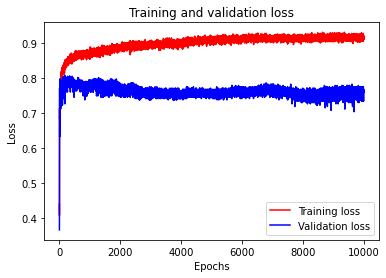

In [359]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Muliple Layer Perceptron (Layer별)

In [360]:
# MLP (Epoch=100, Layer=2, batch size = 60)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, batch_size=60, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Epoch 1/100
11/11 [==============================] - 0s 16ms/step - loss: 0.6915 - acc: 0.5563 - val_loss: 0.6631 - val_acc: 0.6479
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6544 - acc: 0.6752 - val_loss: 0.6416 - val_acc: 0.7116
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6361 - acc: 0.7203 - val_loss: 0.6330 - val_acc: 0.7341
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6273 - acc: 0.7138 - val_loss: 0.6483 - val_acc: 0.6180
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6199 - acc: 0.6929 - val_loss: 0.6106 - val_acc: 0.6966
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6124 - acc: 0.6817 - val_loss: 0.5976 - val_acc: 0.6966
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5955 - acc: 0.6817 - val_loss: 0.5886 - val_acc: 0.7453
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5910 - 

11/11 [==============================] - 0s 2ms/step - loss: 0.4447 - acc: 0.8039 - val_loss: 0.4480 - val_acc: 0.7790
Epoch 64/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4228 - acc: 0.8055 - val_loss: 0.4499 - val_acc: 0.7903
Epoch 65/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4322 - acc: 0.7990 - val_loss: 0.4538 - val_acc: 0.7903
Epoch 66/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4278 - acc: 0.8087 - val_loss: 0.4887 - val_acc: 0.7865
Epoch 67/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4303 - acc: 0.8119 - val_loss: 0.4726 - val_acc: 0.7828
Epoch 68/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4239 - acc: 0.8119 - val_loss: 0.5559 - val_acc: 0.7453
Epoch 69/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4348 - acc: 0.8135 - val_loss: 0.5387 - val_acc: 0.7453
Epoch 70/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4289 - acc: 0

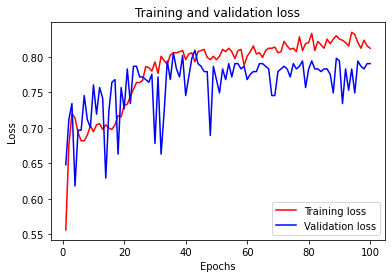

In [361]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [362]:
# MLP (Epoch=100, Layer=10, batch size = 60)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, batch_size=60, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Epoch 1/100
11/11 [==============================] - 0s 15ms/step - loss: 0.6844 - acc: 0.6238 - val_loss: 0.6649 - val_acc: 0.6255
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6601 - acc: 0.6302 - val_loss: 0.6292 - val_acc: 0.6929
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6386 - acc: 0.6640 - val_loss: 0.6025 - val_acc: 0.7228
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6182 - acc: 0.6640 - val_loss: 0.5812 - val_acc: 0.7191
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6043 - acc: 0.6576 - val_loss: 0.5726 - val_acc: 0.7154
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5966 - acc: 0.6640 - val_loss: 0.5663 - val_acc: 0.7041
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5917 - acc: 0.6624 - val_loss: 0.5634 - val_acc: 0.7116
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5863 - 

11/11 [==============================] - 0s 4ms/step - loss: 0.4552 - acc: 0.7894 - val_loss: 0.4793 - val_acc: 0.7828
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4609 - acc: 0.8071 - val_loss: 0.4724 - val_acc: 0.7978
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4251 - acc: 0.8232 - val_loss: 0.5135 - val_acc: 0.7528
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4723 - acc: 0.7862 - val_loss: 0.4850 - val_acc: 0.7566
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4537 - acc: 0.7910 - val_loss: 0.4730 - val_acc: 0.7865
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4275 - acc: 0.8103 - val_loss: 0.5060 - val_acc: 0.7528
Epoch 69/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4589 - acc: 0.7862 - val_loss: 0.6069 - val_acc: 0.7228
Epoch 70/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4518 - acc: 0

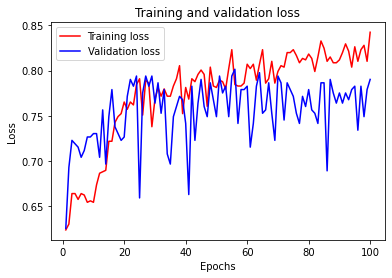

In [363]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [364]:
# MLP (Epoch=100, Layer=20, batch size = 60)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, batch_size=60, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Epoch 1/100
11/11 [==============================] - 0s 20ms/step - loss: 0.6860 - acc: 0.6077 - val_loss: 0.6760 - val_acc: 0.6292
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6715 - acc: 0.6431 - val_loss: 0.6519 - val_acc: 0.7266
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6546 - acc: 0.6656 - val_loss: 0.6283 - val_acc: 0.6966
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6390 - acc: 0.6463 - val_loss: 0.6157 - val_acc: 0.6929
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6307 - acc: 0.6624 - val_loss: 0.5944 - val_acc: 0.7116
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6239 - acc: 0.6527 - val_loss: 0.5896 - val_acc: 0.7228
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6149 - acc: 0.6592 - val_loss: 0.5872 - val_acc: 0.6966
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6088 - 

11/11 [==============================] - 0s 2ms/step - loss: 0.4623 - acc: 0.7926 - val_loss: 0.4908 - val_acc: 0.7978
Epoch 64/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4405 - acc: 0.8232 - val_loss: 0.4912 - val_acc: 0.7903
Epoch 65/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4681 - acc: 0.8087 - val_loss: 0.5543 - val_acc: 0.7416
Epoch 66/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4571 - acc: 0.8071 - val_loss: 0.4918 - val_acc: 0.7753
Epoch 67/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4541 - acc: 0.7942 - val_loss: 0.4865 - val_acc: 0.7790
Epoch 68/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4512 - acc: 0.8023 - val_loss: 0.5040 - val_acc: 0.7715
Epoch 69/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4527 - acc: 0.7974 - val_loss: 0.6802 - val_acc: 0.6629
Epoch 70/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4590 - acc: 0

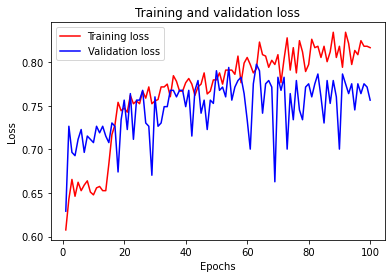

In [365]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 결론

#### 실습에 사용한 데이터는 타이타닉호 탑승자 데이터로, 승객에 대한 정보와 생존여부로 이루어진 형태의 데이터이다.

Epoch을 늘릴수록 Train Set에 대한 Accuracy가 계속해서 증가함을 확인할 수 있었다. 따라서 Epoch이 증가함에 따라 모델이 Train Set에 적합되어 가고 있음을 확인할 수 있다. 반면, Validation Set에 대한 Accuracy는 Epoch이 높아져도 어느순간부터 오히려 떨어지는 경향을 보였는데, Overfitting이 발생하였기 때문이라고 판단된다. Layer를 늘릴 경우에는 무조건 Layer가 깊다고해서, 혹은 얉다고해서 성능이 높고 낮지 않았다. Layer가 깊어지면 일반적으로 성능이 좋아지기 마련이지만 어느순간부터는 Backpropagation 시 기울기가 손실되는 문제가 발생하여 성능이 떨어지게 된다. 따라서 데이터의 특성을 고려한 최적의 Layer를 대입하는 것이 가장 좋은 성능을 이끌어 낼 것으로 판단된다. 